# Part 2 : Data Preprocessing


In [238]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

To start preparing the data, I would like to list a few questions to answer:

The main question:
Which demographic groups respond best to which offer type.

First part: demographic groups:
gender
age group
income class
membership year (old or new)

Second part: offer type:
channel: email, web, social ..
type: bogo, discount, informational
amount: 
minimum spend:

(list all the possible values above)

Best offer: highest amount if offer is in transaction or completed


## A. portfolio

In [239]:
# Prepare column for joining
# Rename columns

# rename the id column
portfolio_preprocessed_data = portfolio.copy()
portfolio_preprocessed_data.rename(columns={'id':'offer_id'},inplace=True)

# rename the duration column
portfolio_preprocessed_data.rename(columns={'duration':'duration_days'},inplace=True)

'''
offer_id = {'ae264e3637204a6fb9bb56bc8210ddfd': 'B1',
            '4d5c57ea9a6940dd891ad53e9dbe8da0': 'B2',
            '3f207df678b143eea3cee63160fa8bed': 'I1',
            '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'B3',
            '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'D1',
            '2298d6c36e964ae4a3e7e9706d1fb8c2': 'D2',
            'fafdcd668e3743c1bb461111dcafc2a4': 'D3',
            '5a8bc65990b245e5a138643cd4eb9837': 'I2',
            'f19421c1d4aa40978ebb69ca19b0e20d': 'B4',
            '2906b810c7d4411798c6938adc9daaa5': 'D4'}

portfolio_preprocessed_data['offer_id'] = portfolio_preprocessed_data['offer_id'].apply(lambda x: offer_id[x] if x else None)
'''
# expnad the channels column
portfolio_preprocessed_data = pd.concat([portfolio_preprocessed_data[:],portfolio_preprocessed_data['channels'].str.join(sep='*').str.get_dummies(sep='*').add_prefix('channel_')],axis=1)

# Expand column offer_type into the 3 different types
portfolio_preprocessed_data = pd.concat([portfolio_preprocessed_data[:],pd.get_dummies(portfolio_preprocessed_data['offer_type'], prefix= 'offer_type')],axis=1)

# create duration_days column
portfolio_preprocessed_data['duration_hours'] = portfolio_preprocessed_data['duration_days'] * 24

# drop unnecessary columns
portfolio_preprocessed_data.drop(['channels'], axis=1, inplace=True)
portfolio_preprocessed_data.head()

,reward,difficulty,duration_days,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,duration_hours
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0,168
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,120
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1,96
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0,168
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0,240


In [240]:
list(portfolio_preprocessed_data.columns) 

['reward',
 'difficulty',
 'duration_days',
 'offer_type',
 'offer_id',
 'channel_email',
 'channel_mobile',
 'channel_social',
 'channel_web',
 'offer_type_bogo',
 'offer_type_discount',
 'offer_type_informational',
 'duration_hours']

In [241]:
portfolio_preprocessed_data = portfolio_preprocessed_data[['offer_id',
 'duration_days',
 'duration_hours',
 'reward',
 'difficulty',
 'channel_email',
 'channel_mobile',
 'channel_social',
 'channel_web',
 'offer_type',
 'offer_type_bogo',
 'offer_type_discount',
 'offer_type_informational']]
portfolio_preprocessed_data

,offer_id,duration_days,duration_hours,reward,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type,offer_type_bogo,offer_type_discount,offer_type_informational
0,ae264e3637204a6fb9bb56bc8210ddfd,7,168,10,10,1,1,1,0,bogo,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,5,120,10,10,1,1,1,1,bogo,1,0,0
2,3f207df678b143eea3cee63160fa8bed,4,96,0,0,1,1,0,1,informational,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,7,168,5,5,1,1,0,1,bogo,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,10,240,5,20,1,0,0,1,discount,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,7,1,1,1,1,discount,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,10,1,1,1,1,discount,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,3,72,0,0,1,1,1,0,informational,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,120,5,5,1,1,1,1,bogo,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,7,168,2,10,1,1,0,1,discount,0,1,0


In [314]:
portfolio_preprocessed_data[(portfolio_preprocessed_data['offer_id'] == '2298d6c36e964ae4a3e7e9706d1fb8c2') | (portfolio_preprocessed_data['offer_id'] == 'fafdcd668e3743c1bb461111dcafc2a4')]

,offer_id,duration_days,duration_hours,reward,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type,offer_type_bogo,offer_type_discount,offer_type_informational
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,168,3,7,1,1,1,1,discount,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,240,2,10,1,1,1,1,discount,0,1,0


## B. profile

In [242]:
profile_preprocessed_data = profile.copy()
profile_preprocessed_data.rename(columns={'id':'person_id'},inplace=True)
# Pre-processing
# Study the null values further
# It was given in the project overview that the missing values in the age column were encoded as 118
# From looking at the count of the null values of columns: gender & income (2,175), 
# and the count of the age values equal to 118 (2,175), we can assume that whenever the age value was missing
# and encoded by 118, the gender and income were also missing. A quick way to check is to drop all missing 
# values and check if any value with age 118 still exist:

print(profile_preprocessed_data[profile_preprocessed_data['age']==118].count())
profile_preprocessed_data[['age','gender','income']][profile_preprocessed_data['age']==118].head()

# These records are useless and it's safe to drop them
# The alternative is to replace them with other values such as the mean. 
# However, in this particluar case this will be misleading. In addition, we are only losing 13% of the dataset
# Total number of customers left is 14,825
profile_preprocessed_data = profile_preprocessed_data.dropna()
# No more null values 
profile_preprocessed_data.isnull().sum()

gender                 0
age                 2175
person_id           2175
became_member_on    2175
income                 0
dtype: int64


gender              0
age                 0
person_id           0
became_member_on    0
income              0
dtype: int64

In [243]:
# Convert the date to a format that we can use in the analysis 
profile_preprocessed_data['became_member_on'].head()

1     20170715
3     20170509
5     20180426
8     20180209
12    20171111
Name: became_member_on, dtype: int64

In [244]:
profile_preprocessed_data['became_member_on_date'] = pd.to_datetime(profile_preprocessed_data['became_member_on'], format='%Y%m%d')
profile_preprocessed_data['became_member_on_year'] = pd.DatetimeIndex(profile_preprocessed_data['became_member_on_date']).year
profile_preprocessed_data['became_member_on_month'] = pd.DatetimeIndex(profile_preprocessed_data['became_member_on_date']).month
profile_preprocessed_data['became_member_on_day'] = pd.DatetimeIndex(profile_preprocessed_data['became_member_on_date']).day

In [245]:
# This function takes the age, assign a label and returns the matching label 
def age_group(age):
    '''
    INPUT
    age - the customer age
    
    OUTPUT
    Object of the label of the age group
    '''
    '''
    if age.between(0,15):
        return 'Child'
    ...
    '''
    if (age >=0) & (age <15):
        return 'Child'
    if (age >=15) & (age <25):
        return 'Youth'
    if (age >=25) & (age <65):
        return 'Adult'
    if (age >=65):
        return 'Senior'
    
profile_preprocessed_data.loc[:,'age_group'] = profile_preprocessed_data.apply(lambda x: age_group(x['age']), axis=1)  
profile_preprocessed_data

,gender,age,person_id,became_member_on,income,became_member_on_date,became_member_on_year,became_member_on_month,became_member_on_day,age_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,2017-07-15,2017,7,15,Adult
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,2017-05-09,2017,5,9,Senior
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,2018-04-26,2018,4,26,Senior
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,2018-02-09,2018,2,9,Senior
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,2017-11-11,2017,11,11,Adult
...,...,...,...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,2018-06-04,2018,6,4,Adult
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,2018-07-13,2018,7,13,Adult
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,2017-01-26,2017,1,26,Adult
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,2016-03-07,2016,3,7,Senior


In [246]:
# refrence: https://www.thebalance.com/
# However, I added an additional class: Lower middle class to zoom in the middle class since 
# the majority of the customer are from that class

def income_class(income):
    '''
    INPUT
    income - the customer income
    
    OUTPUT
    Object of the label of the income class
    '''
    if (income < 20000):
        return 'Below or near poverty level'
    if (income >=20000) & (income <45000): 
        return 'Low income'
    if (income >=45000) & (income <90000):
        return 'Lower middle class'
    if (income >=90000) & (income <140000):
        return 'Middle class'
    if (income >=140000) & (income <150000):
        return 'Upper middle class'
    if (income >=150000) & (income <200000): 
        return 'High income'
    if (income >= 200000):
        return 'Highest tax brackets'
    
profile_preprocessed_data['income_class'] = profile_preprocessed_data.apply(lambda x: income_class(x['income']), axis=1)  

In [247]:
profile_preprocessed_data.groupby('income_class')['income_class'].count()

income_class
Low income            2869
Lower middle class    9648
Middle class          2308
Name: income_class, dtype: int64

In [248]:
profile_preprocessed_data.duplicated().sum()

0

In [249]:
list(profile_preprocessed_data.columns) 

['gender',
 'age',
 'person_id',
 'became_member_on',
 'income',
 'became_member_on_date',
 'became_member_on_year',
 'became_member_on_month',
 'became_member_on_day',
 'age_group',
 'income_class']

In [250]:
#reorder the columns
profile_preprocessed_data = profile_preprocessed_data[[ 'person_id',
 'gender',
 'age',
 'age_group',
 'income',
 'income_class',
 'became_member_on',
 'became_member_on_date',
 'became_member_on_year',
 'became_member_on_month',
 'became_member_on_day']]
profile_preprocessed_data

,person_id,gender,age,age_group,income,income_class,became_member_on,became_member_on_date,became_member_on_year,became_member_on_month,became_member_on_day
1,0610b486422d4921ae7d2bf64640c50b,F,55,Adult,112000.0,Middle class,20170715,2017-07-15,2017,7,15
3,78afa995795e4d85b5d9ceeca43f5fef,F,75,Senior,100000.0,Middle class,20170509,2017-05-09,2017,5,9
5,e2127556f4f64592b11af22de27a7932,M,68,Senior,70000.0,Lower middle class,20180426,2018-04-26,2018,4,26
8,389bc3fa690240e798340f5a15918d5c,M,65,Senior,53000.0,Lower middle class,20180209,2018-02-09,2018,2,9
12,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Adult,51000.0,Lower middle class,20171111,2017-11-11,2017,11,11
...,...,...,...,...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,Adult,54000.0,Lower middle class,20180604,2018-06-04,2018,6,4
16996,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Adult,72000.0,Lower middle class,20180713,2018-07-13,2018,7,13
16997,01d26f638c274aa0b965d24cefe3183f,M,49,Adult,73000.0,Lower middle class,20170126,2017-01-26,2017,1,26
16998,9dc1421481194dcd9400aec7c9ae6366,F,83,Senior,50000.0,Lower middle class,20160307,2016-03-07,2016,3,7


Questions:
    What is the average age of Starbucks customers?

Average customer age is 54.39352445193929


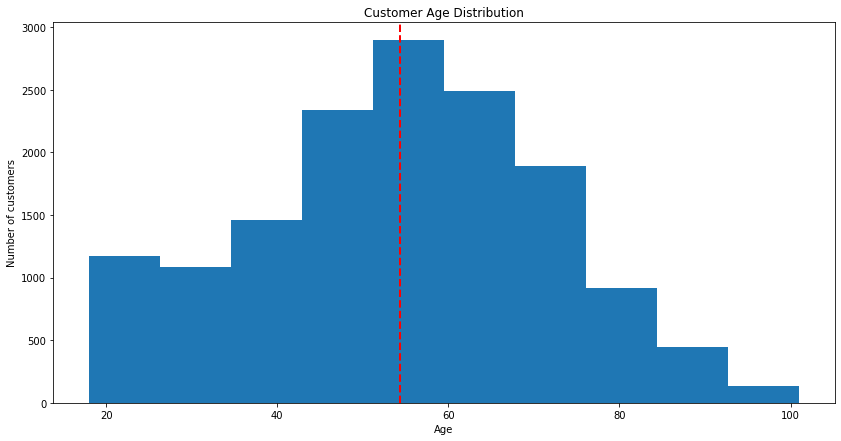

In [310]:
# Age distribution of Starbucks customers
plt.figure(figsize=(14, 7))
plt.hist(profile_preprocessed_data['age'])
plt.axvline(profile_preprocessed_data['age'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Customer Age Distribution')
print('Average customer age is {}'.format(profile_preprocessed_data['age'].mean()))

Text(0, 0.5, 'Count of Customers')

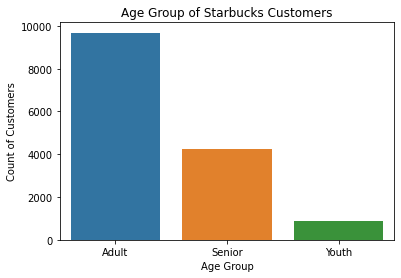

In [252]:
# Age distribution of Starbucks customers
sns.countplot(profile_preprocessed_data['age_group'])
plt.title('Age Group of Starbucks Customers')
plt.xlabel('Age Group')
plt.ylabel('Count of Customers')

What is the average income of Starbucks customers?

Average customer income is 65404.9915682968


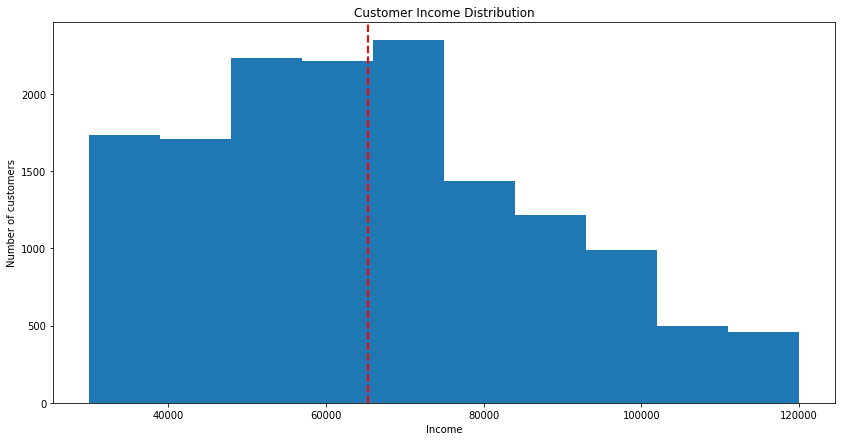

In [253]:
# Income distribution of Starbucks customers
plt.figure(figsize=(14, 7))
plt.hist(profile_preprocessed_data['income'])
plt.axvline(profile_preprocessed_data['income'].mean(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Income')
plt.ylabel('Number of customers')
plt.title('Customer Income Distribution')
print('Average customer income is {}'.format(profile_preprocessed_data['income'].mean()))

Text(0, 0.5, 'Count of Customers')

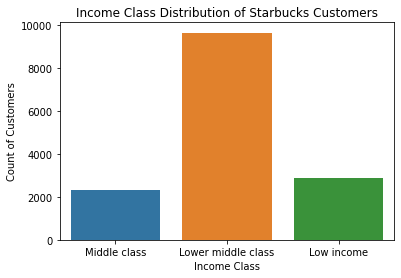

In [254]:
# Income distribution of Starbucks customers
sns.countplot(profile_preprocessed_data['income_class'])
plt.title('Income Class Distribution of Starbucks Customers')
plt.xlabel('Income Class')
plt.ylabel('Count of Customers')

Text(0, 0.5, 'Count of New Members')

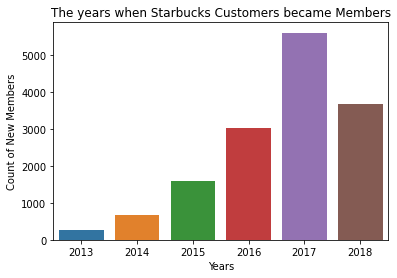

In [255]:
# When did the customers became members
sns.countplot(profile_preprocessed_data['became_member_on_year'])
plt.title('The years when Starbucks Customers became Members')
plt.xlabel('Years')
plt.ylabel('Count of New Members')

In [312]:
profile_preprocessed_data.groupby(['became_member_on_year'])['became_member_on_year'].count()

became_member_on_year
2013     274
2014     662
2015    1597
2016    3024
2017    5599
2018    3669
Name: became_member_on_year, dtype: int64

Text(0, 0.5, 'New Members')

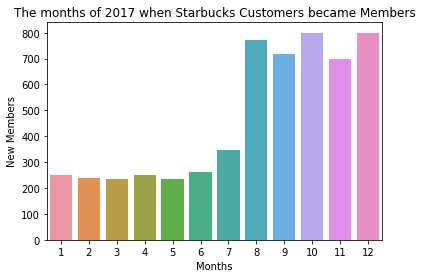

In [256]:
# What happened in 2017
profile_2017 = profile_preprocessed_data[profile_preprocessed_data['became_member_on_year'] == 2017]
sns.countplot(profile_2017['became_member_on_month'])
plt.title('The months of 2017 when Starbucks Customers became Members')
plt.xlabel('Months')
plt.ylabel('New Members')

## C. transcript

In [257]:
transcript_preprocessed_data = transcript.copy()
transcript_preprocessed_data.rename(columns={'person':'person_id','time':'time_hours'},inplace=True)

# drop persons_id who don't have profiles
transcript_preprocessed_data = transcript_preprocessed_data[transcript_preprocessed_data['person_id'].isin(profile_preprocessed_data['person_id'])]
# We are left with 14825 unique customers
transcript_preprocessed_data['person_id'].nunique()

14825

In [258]:
# It was given in the project overview that the value column is a dictionar of different values 
# depending on event type. However, we seem to have more than 3 values. Let's see what they are: 
values = []
for idx, row in transcript_preprocessed_data.iterrows():
    for v in row['value']:
        if v in values:
            continue
        else:
            values.append(v)

values

['offer id', 'amount', 'offer_id', 'reward']

In [259]:
# convert time to days
#transcript_preprocessed_data['time_days'] = transcript_preprocessed_data['time_hours'] / 24

# Expand column value into the 4 different value categories
transcript_preprocessed_data = pd.concat([transcript_preprocessed_data, transcript_preprocessed_data['value'].apply(pd.Series)], axis=1)

# Copy the data from column offer id to offer_id before dropping it
transcript_preprocessed_data['offer_id'] = np.where(transcript_preprocessed_data['offer_id'].isnull(), transcript_preprocessed_data['offer id'],transcript_preprocessed_data['offer_id'])

# We have 2 columns of the offer id: offer id and offer_id
# drop the columns: value and offer id 
transcript_preprocessed_data.drop(['offer id', 'value'], axis=1, inplace=True)

# prepare column "event" for exapnding it
transcript_preprocessed_data['event'] = transcript_preprocessed_data['event'].str.replace(' ', '_')
transcript_preprocessed_data = pd.concat([transcript_preprocessed_data[:],pd.get_dummies(transcript_preprocessed_data['event'])],axis=1)

In [261]:
transcript_preprocessed_data 

,person_id,event,time_hours,amount,offer_id,reward,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer_received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0
5,389bc3fa690240e798340f5a15918d5c,offer_received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0,1,0,0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer_received,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0,1,0,0
8,aa4862eba776480b8bb9c68455b8c2e1,offer_received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer_completed,714,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0,1,0,0,0
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,NaN,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,NaN,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,NaN,0,0,0,1


In [262]:
list(transcript_preprocessed_data.columns) 

['person_id',
 'event',
 'time_hours',
 'amount',
 'offer_id',
 'reward',
 'offer_completed',
 'offer_received',
 'offer_viewed',
 'transaction']

In [263]:
#reorder the columns
transcript_preprocessed_data = transcript_preprocessed_data[[ 'offer_id',
 'person_id',
 'event',
 'time_hours',
 'amount',
 'reward',
 'offer_received',                                                          
 'offer_viewed',
 'offer_completed',
 'transaction']]
transcript_preprocessed_data

,offer_id,person_id,event,time_hours,amount,reward,offer_received,offer_viewed,offer_completed,transaction
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,NaN,NaN,1,0,0,0
2,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,offer_received,0,NaN,NaN,1,0,0,0
5,f19421c1d4aa40978ebb69ca19b0e20d,389bc3fa690240e798340f5a15918d5c,offer_received,0,NaN,NaN,1,0,0,0
7,3f207df678b143eea3cee63160fa8bed,2eeac8d8feae4a8cad5a6af0499a211d,offer_received,0,NaN,NaN,1,0,0,0
8,0b1e1539f2cc45b7b9fa7c272da2e1d7,aa4862eba776480b8bb9c68455b8c2e1,offer_received,0,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
306527,fafdcd668e3743c1bb461111dcafc2a4,24f56b5e1849462093931b164eb803b5,offer_completed,714,NaN,2.0,0,0,1,0
306529,NaN,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,0,0,0,1
306530,NaN,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,0,0,0,1
306531,NaN,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,0,0,0,1


Text(0, 0.5, 'Count of Offers')

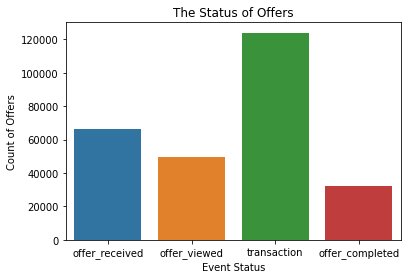

In [286]:
# The status of the events
sns.countplot(transcript_preprocessed_data['event'])
plt.title('The Status of Events')
plt.xlabel('Event Status')
plt.ylabel('Count of Records')

# Part 3: Data Analysis

In [265]:
# Join the 3 data frames:
# merge transcript and profile data to copy customer data and with portfolio to copy offer type and its info
transcript_preprocessed_data = transcript_preprocessed_data.merge(profile_preprocessed_data, how ='left', on ='person_id')

In [266]:
# merge transcript with portfolio
transcript_preprocessed_data = transcript_preprocessed_data.merge(portfolio_preprocessed_data, how='left', on='offer_id')
transcript_preprocessed_data.head(5)

,offer_id,person_id,event,time_hours,amount,reward_x,offer_received,offer_viewed,offer_completed,transaction,...,reward_y,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type,offer_type_bogo,offer_type_discount,offer_type_informational
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer_received,0,NaN,NaN,1,0,0,0,...,5.0,5.0,1.0,1.0,0.0,1.0,bogo,1.0,0.0,0.0
1,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,offer_received,0,NaN,NaN,1,0,0,0,...,2.0,10.0,1.0,1.0,0.0,1.0,discount,0.0,1.0,0.0
2,f19421c1d4aa40978ebb69ca19b0e20d,389bc3fa690240e798340f5a15918d5c,offer_received,0,NaN,NaN,1,0,0,0,...,5.0,5.0,1.0,1.0,1.0,1.0,bogo,1.0,0.0,0.0
3,3f207df678b143eea3cee63160fa8bed,2eeac8d8feae4a8cad5a6af0499a211d,offer_received,0,NaN,NaN,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,informational,0.0,0.0,1.0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,aa4862eba776480b8bb9c68455b8c2e1,offer_received,0,NaN,NaN,1,0,0,0,...,5.0,20.0,1.0,0.0,0.0,1.0,discount,0.0,1.0,0.0


In [267]:
#change column name: reward_x = rewarded_amount, reward_y = offer_reward
transcript_preprocessed_data.rename(columns={'reward_x':'rewarded_amount','reward_y':'offer_reward'},inplace=True)

In [268]:
transcript_preprocessed_data.duplicated().sum()

374

In [269]:
# drop the duplicated records, and reset the index
transcript_preprocessed_data.drop_duplicates(inplace=True)
transcript_preprocessed_data.reset_index(drop=True, inplace=True)

In [270]:
transcript_preprocessed_data.shape

(272388, 32)

What is the most common offer?

Text(0, 0.5, 'Count of Transactions')

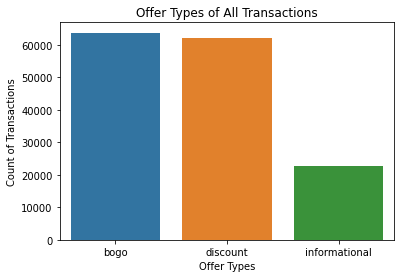

In [292]:
# The types of the all transactions
sns.countplot(transcript_preprocessed_data['offer_type'])
plt.title('Offer Types of All Transactions')
plt.xlabel('Offer Types')
plt.ylabel('Count of Transactions')

In [288]:
transcript_preprocessed_data.groupby(['event','offer_type'])['offer_type'].count()

event            offer_type   
offer_completed  bogo             15100
                 discount         16970
offer_received   bogo             26537
                 discount         26664
                 informational    13300
offer_viewed     bogo             22039
                 discount         18461
                 informational     9360
Name: offer_type, dtype: int64

In [ ]:
completed_transcript_event = transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed']
completed_transcript_event.tail(20)

(array([0, 1]), [Text(0, 0, 'discount'), Text(1, 0, 'bogo')])

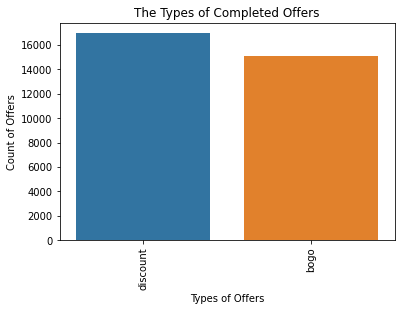

In [275]:
# The types of completed offers
sns.countplot(completed_transcript_event['offer_type'])
plt.title('The Types of Completed Offers')
plt.xlabel('Types of Offers')
plt.ylabel('Count of Offers')
plt.xticks(rotation = 90)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

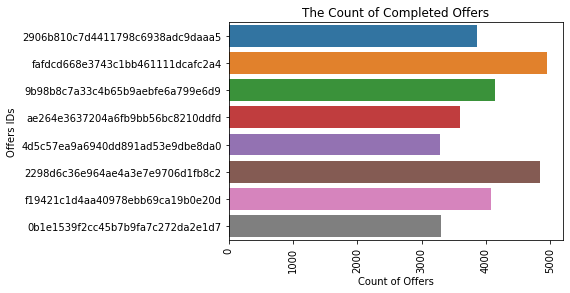

In [285]:
# The status of the offers
sns.countplot(y = completed_transcript_event['offer_id'])
plt.title('The Count of Completed Offers')
plt.xlabel('Count of Offers')
plt.ylabel('Offers IDs')
plt.xticks(rotation = 90)

Who are the most frequent customers with the highest amount spent?

In [289]:
frequent_customers = transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'transaction'].groupby(['person_id','gender','age','age_group','income','became_member_on_date', 'became_member_on_year'])['amount'].sum().reset_index().sort_values('amount', ascending=False)
frequent_customers.head(10)

,person_id,gender,age,age_group,income,became_member_on_date,became_member_on_year,amount
3427,3c8d541112a74af99e88abbd0692f00e,M,77,Senior,97000.0,2017-09-26,2017,1608.69
13706,f1d65ae63f174b8f80fa063adcaa63b7,M,32,Adult,64000.0,2018-06-19,2018,1365.66
9985,ae6f43089b674728a50b8727252d3305,F,36,Adult,71000.0,2017-05-21,2017,1327.74
5574,626df8678e2a4953b9098246418c9cfa,M,53,Adult,103000.0,2015-08-25,2015,1321.42
6551,73afdeca19e349b98f09e928644610f8,M,50,Adult,86000.0,2016-05-12,2016,1319.97
4697,52959f19113e4241a8cb3bef486c6412,M,55,Adult,111000.0,2016-12-20,2016,1292.86
9904,ad1f0a409ae642bc9a43f31f56c130fc,M,66,Senior,80000.0,2017-08-27,2017,1258.19
11927,d240308de0ee4cf8bb6072816268582b,F,43,Adult,94000.0,2017-06-30,2017,1251.99
8446,946fc0d3ecc4492aa4cc06cf6b1492c3,M,58,Adult,79000.0,2017-06-04,2017,1232.40
5678,6406abad8e2c4b8584e4f68003de148d,M,67,Senior,79000.0,2016-02-28,2016,1211.76


In [304]:
most_rewarded_customers = transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed'].groupby(['person_id','gender','age','age_group','income','became_member_on_date', 'became_member_on_year'])['rewarded_amount'].sum().reset_index().sort_values('rewarded_amount', ascending=False)
most_rewarded_customers.head(10)

,person_id,gender,age,age_group,income,became_member_on_date,became_member_on_year,rewarded_amount
9434,c93f9619abd642a684bd79953cef992c,F,24,Youth,59000.0,2017-02-07,2017,50.0
10737,e51350fc39f54b47842fa13c49f7400b,F,53,Adult,91000.0,2017-04-03,2017,50.0
8927,bd920b7b033d42fb9d97be92343a9aef,F,52,Adult,97000.0,2017-01-12,2017,50.0
10548,e130d81685ae45deb9fbf6d416084a1d,F,88,Senior,89000.0,2017-07-24,2017,50.0
2626,38999f1dd0d44dc2b2f8278d2409681a,M,21,Youth,44000.0,2016-11-18,2016,47.0
11981,fff29fb549084123bd046dbc5ceb4faa,F,59,Adult,93000.0,2017-08-31,2017,47.0
1898,2a13705c79fd44bc91207deb5374b7ad,M,67,Senior,45000.0,2016-01-27,2016,47.0
6116,83050d3e8f1841469a596565018383f1,F,62,Adult,120000.0,2017-01-30,2017,45.0
9420,c8f6b6d4decd48c1a81b6c8fcf567958,F,19,Youth,54000.0,2017-01-25,2017,45.0
8342,b0e48cab3d794637b8f9209090989e92,M,42,Adult,68000.0,2017-08-06,2017,45.0


In [305]:
transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed'].groupby(['gender'])['rewarded_amount'].sum().reset_index().sort_values('rewarded_amount', ascending=False)


,gender,rewarded_amount
1,M,78218.0
0,F,77928.0
2,O,2484.0


In [307]:
transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed'].groupby(['age_group'])['rewarded_amount'].sum().reset_index().sort_values('rewarded_amount', ascending=False)


,age_group,rewarded_amount
0,Adult,103484.0
1,Senior,48444.0
2,Youth,6702.0


In [308]:
transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed'].groupby(['became_member_on_year'])['rewarded_amount'].sum().reset_index().sort_values('rewarded_amount', ascending=False)


,became_member_on_year,rewarded_amount
4,2017,60236.0
3,2016,44585.0
5,2018,24787.0
2,2015,21023.0
1,2014,5561.0
0,2013,2438.0


Text(0,0.5,'Count of Offers')

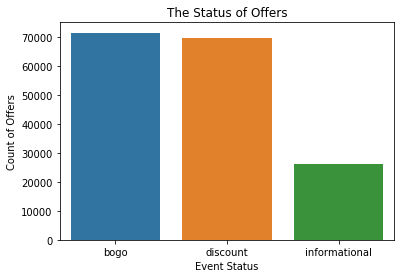

In [99]:
# The types of the offers
sns.countplot(transcript_preprocessed_data['offer_type'])
plt.title('Offer Types of All Transactions')
plt.xlabel('Offer Types')
plt.ylabel('Count of Transactions')

In [105]:
transcript_offer_completed_data = transcript_preprocessed_data[transcript_preprocessed_data['event'] == 'offer_completed']
transcript_offer_completed_data

,offer_id,person_id,event,time_hours,amount,reward_x,offer_received,offer_viewed,offer_completed,transaction,...,duration_hours,reward_y,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational
11031,2906b810c7d4411798c6938adc9daaa5,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer_completed,0,NaN,2.0,0,0,1,0,...,168.0,2.0,10.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
11042,fafdcd668e3743c1bb461111dcafc2a4,fe97aa22dd3e48c8b143116a8403dd52,offer_completed,0,NaN,2.0,0,0,1,0,...,240.0,2.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
11048,9b98b8c7a33c4b65b9aebfe6a799e6d9,629fc02d56414d91bca360decdfa9288,offer_completed,0,NaN,5.0,0,0,1,0,...,168.0,5.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
11056,ae264e3637204a6fb9bb56bc8210ddfd,676506bad68e4161b9bbaffeb039626b,offer_completed,0,NaN,10.0,0,0,1,0,...,168.0,10.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
11060,4d5c57ea9a6940dd891ad53e9dbe8da0,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer_completed,0,NaN,10.0,0,0,1,0,...,120.0,10.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272319,0b1e1539f2cc45b7b9fa7c272da2e1d7,f3e801caeafe4899b3b989b586e74ac7,offer_completed,714,NaN,5.0,0,0,1,0,...,240.0,5.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
272331,fafdcd668e3743c1bb461111dcafc2a4,452cdae2c68e4732a4177d3929562690,offer_completed,714,NaN,2.0,0,0,1,0,...,240.0,2.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
272336,2298d6c36e964ae4a3e7e9706d1fb8c2,0c027f5f34dd4b9eba0a25785c611273,offer_completed,714,NaN,3.0,0,0,1,0,...,168.0,3.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
272365,fafdcd668e3743c1bb461111dcafc2a4,8431c16f8e1d440880db371a68f82dd0,offer_completed,714,NaN,2.0,0,0,1,0,...,240.0,2.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [110]:
'''
#took days and never completed

counter = 0
for i in range(transcript_offer_completed_data.shape[0]):
    for j in range(transcript_transaction_data.shape[0]):
        if (transcript_offer_completed_data.iloc[i]['person_id'] == transcript_transaction_data.iloc[j]['person_id'])\
           & (transcript_offer_completed_data.iloc[i]['time_hours'] == transcript_transaction_data.iloc[j]['time_hours']):
            offer_id = transcript_offer_completed_data.iloc[i]['offer_id']
            counter +=1
            transcript_transaction_data.iloc[j]['offer_id'] = offer_id
            print('counter: ',counter)
            print('offer_id: ',offer_id)
 '''           

<ipython-input-110-202532532ec8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcript_transaction_data.iloc[j]['offer_id'] = offer_id


counter:  1
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  2
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  3
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  4
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  5
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  6
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  7
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  8
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  9
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  10
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  11
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  12
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  13
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  14
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  15
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  16
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  17
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  18
offer_id:  2298d6c36e964ae4

counter:  145
offer_id:  0b1e1539f2cc45b7b9fa7c272da2e1d7
counter:  146
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  147
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  148
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  149
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  150
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  151
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  152
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  153
offer_id:  0b1e1539f2cc45b7b9fa7c272da2e1d7
counter:  154
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  155
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  156
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  157
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  158
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  159
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  160
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  161
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  162


counter:  287
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  288
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  289
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  290
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  291
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  292
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  293
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  294
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  295
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  296
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  297
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  298
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  299
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  300
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  301
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  302
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  303
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  304


counter:  429
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  430
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  431
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  432
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  433
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  434
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  435
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  436
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  437
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  438
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  439
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  440
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  441
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  442
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  443
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  444
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  445
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  446


counter:  571
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  572
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  573
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  574
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  575
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  576
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  577
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  578
offer_id:  0b1e1539f2cc45b7b9fa7c272da2e1d7
counter:  579
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  580
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  581
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  582
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  583
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  584
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  585
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  586
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  587
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  588


counter:  713
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  714
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  715
offer_id:  0b1e1539f2cc45b7b9fa7c272da2e1d7
counter:  716
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  717
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  718
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  719
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  720
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  721
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  722
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  723
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  724
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  725
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  726
offer_id:  f19421c1d4aa40978ebb69ca19b0e20d
counter:  727
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  728
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  729
offer_id:  9b98b8c7a33c4b65b9aebfe6a799e6d9
counter:  730


counter:  855
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  856
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  857
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  858
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  859
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  860
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  861
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  862
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  863
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  864
offer_id:  0b1e1539f2cc45b7b9fa7c272da2e1d7
counter:  865
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  866
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  867
offer_id:  2906b810c7d4411798c6938adc9daaa5
counter:  868
offer_id:  fafdcd668e3743c1bb461111dcafc2a4
counter:  869
offer_id:  2298d6c36e964ae4a3e7e9706d1fb8c2
counter:  870
offer_id:  ae264e3637204a6fb9bb56bc8210ddfd
counter:  871
offer_id:  4d5c57ea9a6940dd891ad53e9dbe8da0
counter:  872


KeyboardInterrupt: 

In [111]:
# read transcript_offer_completed_data & transcript_transaction_data row by row. Ifthe 2 records have the same 
# person_id and the were completed at the same time, I'm assuming that the transaction belongs to that
# particular offer. Then, fill in the new offer_id_1 column with the offer_id from the offer_completed record
counter = 0
transcript_transaction_data['offer_id_1'] = '0'

for i in transcript_offer_completed_data.itertuples():
    for j in transcript_transaction_data.itertuples():
        if (i.person_id == j.person_id) & (i.time_hours == j.time_hours):
            transcript_transaction_data.at[j.Index, 'offer_id_1'] = i.offer_id
            counter +=1
            print('counter: ',counter)

<ipython-input-111-3e34377bb2be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcript_transaction_data['offer_id_1'] = '0'


counter:  1
counter:  2
counter:  3
counter:  4
counter:  5
counter:  6
counter:  7
counter:  8
counter:  9
counter:  10
counter:  11
counter:  12
counter:  13
counter:  14
counter:  15
counter:  16
counter:  17
counter:  18
counter:  19
counter:  20
counter:  21
counter:  22
counter:  23
counter:  24
counter:  25
counter:  26
counter:  27
counter:  28
counter:  29
counter:  30
counter:  31
counter:  32
counter:  33
counter:  34
counter:  35
counter:  36
counter:  37
counter:  38
counter:  39
counter:  40
counter:  41
counter:  42
counter:  43
counter:  44
counter:  45
counter:  46
counter:  47
counter:  48
counter:  49
counter:  50
counter:  51
counter:  52
counter:  53
counter:  54
counter:  55
counter:  56
counter:  57
counter:  58
counter:  59
counter:  60
counter:  61
counter:  62
counter:  63
counter:  64
counter:  65
counter:  66
counter:  67
counter:  68
counter:  69
counter:  70
counter:  71
counter:  72
counter:  73
counter:  74
counter:  75
counter:  76
counter:  77
counter:

counter:  594
counter:  595
counter:  596
counter:  597
counter:  598
counter:  599
counter:  600
counter:  601
counter:  602
counter:  603
counter:  604
counter:  605
counter:  606
counter:  607
counter:  608
counter:  609
counter:  610
counter:  611
counter:  612
counter:  613
counter:  614
counter:  615
counter:  616
counter:  617
counter:  618
counter:  619
counter:  620
counter:  621
counter:  622
counter:  623
counter:  624
counter:  625
counter:  626
counter:  627
counter:  628
counter:  629
counter:  630
counter:  631
counter:  632
counter:  633
counter:  634
counter:  635
counter:  636
counter:  637
counter:  638
counter:  639
counter:  640
counter:  641
counter:  642
counter:  643
counter:  644
counter:  645
counter:  646
counter:  647
counter:  648
counter:  649
counter:  650
counter:  651
counter:  652
counter:  653
counter:  654
counter:  655
counter:  656
counter:  657
counter:  658
counter:  659
counter:  660
counter:  661
counter:  662
counter:  663
counter:  664
counte

counter:  1168
counter:  1169
counter:  1170
counter:  1171
counter:  1172
counter:  1173
counter:  1174
counter:  1175
counter:  1176
counter:  1177
counter:  1178
counter:  1179
counter:  1180
counter:  1181
counter:  1182
counter:  1183
counter:  1184
counter:  1185
counter:  1186
counter:  1187
counter:  1188
counter:  1189
counter:  1190
counter:  1191
counter:  1192
counter:  1193
counter:  1194
counter:  1195
counter:  1196
counter:  1197
counter:  1198
counter:  1199
counter:  1200
counter:  1201
counter:  1202
counter:  1203
counter:  1204
counter:  1205
counter:  1206
counter:  1207
counter:  1208
counter:  1209
counter:  1210
counter:  1211
counter:  1212
counter:  1213
counter:  1214
counter:  1215
counter:  1216
counter:  1217
counter:  1218
counter:  1219
counter:  1220
counter:  1221
counter:  1222
counter:  1223
counter:  1224
counter:  1225
counter:  1226
counter:  1227
counter:  1228
counter:  1229
counter:  1230
counter:  1231
counter:  1232
counter:  1233
counter:  

counter:  1715
counter:  1716
counter:  1717
counter:  1718
counter:  1719
counter:  1720
counter:  1721
counter:  1722
counter:  1723
counter:  1724
counter:  1725
counter:  1726
counter:  1727
counter:  1728
counter:  1729
counter:  1730
counter:  1731
counter:  1732
counter:  1733
counter:  1734
counter:  1735
counter:  1736
counter:  1737
counter:  1738
counter:  1739
counter:  1740
counter:  1741
counter:  1742
counter:  1743
counter:  1744
counter:  1745
counter:  1746
counter:  1747
counter:  1748
counter:  1749
counter:  1750
counter:  1751
counter:  1752
counter:  1753
counter:  1754
counter:  1755
counter:  1756
counter:  1757
counter:  1758
counter:  1759
counter:  1760
counter:  1761
counter:  1762
counter:  1763
counter:  1764
counter:  1765
counter:  1766
counter:  1767
counter:  1768
counter:  1769
counter:  1770
counter:  1771
counter:  1772
counter:  1773
counter:  1774
counter:  1775
counter:  1776
counter:  1777
counter:  1778
counter:  1779
counter:  1780
counter:  

counter:  2262
counter:  2263
counter:  2264
counter:  2265
counter:  2266
counter:  2267
counter:  2268
counter:  2269
counter:  2270
counter:  2271
counter:  2272
counter:  2273
counter:  2274
counter:  2275
counter:  2276
counter:  2277
counter:  2278
counter:  2279
counter:  2280
counter:  2281
counter:  2282
counter:  2283
counter:  2284
counter:  2285
counter:  2286
counter:  2287
counter:  2288
counter:  2289
counter:  2290
counter:  2291
counter:  2292
counter:  2293
counter:  2294
counter:  2295
counter:  2296
counter:  2297
counter:  2298
counter:  2299
counter:  2300
counter:  2301
counter:  2302
counter:  2303
counter:  2304
counter:  2305
counter:  2306
counter:  2307
counter:  2308
counter:  2309
counter:  2310
counter:  2311
counter:  2312
counter:  2313
counter:  2314
counter:  2315
counter:  2316
counter:  2317
counter:  2318
counter:  2319
counter:  2320
counter:  2321
counter:  2322
counter:  2323
counter:  2324
counter:  2325
counter:  2326
counter:  2327
counter:  

counter:  2809
counter:  2810
counter:  2811
counter:  2812
counter:  2813
counter:  2814
counter:  2815
counter:  2816
counter:  2817
counter:  2818
counter:  2819
counter:  2820
counter:  2821
counter:  2822
counter:  2823
counter:  2824
counter:  2825
counter:  2826
counter:  2827
counter:  2828
counter:  2829
counter:  2830
counter:  2831
counter:  2832
counter:  2833
counter:  2834
counter:  2835
counter:  2836
counter:  2837
counter:  2838
counter:  2839
counter:  2840
counter:  2841
counter:  2842
counter:  2843
counter:  2844
counter:  2845
counter:  2846
counter:  2847
counter:  2848
counter:  2849
counter:  2850
counter:  2851
counter:  2852
counter:  2853
counter:  2854
counter:  2855
counter:  2856
counter:  2857
counter:  2858
counter:  2859
counter:  2860
counter:  2861
counter:  2862
counter:  2863
counter:  2864
counter:  2865
counter:  2866
counter:  2867
counter:  2868
counter:  2869
counter:  2870
counter:  2871
counter:  2872
counter:  2873
counter:  2874
counter:  

counter:  3356
counter:  3357
counter:  3358
counter:  3359
counter:  3360
counter:  3361
counter:  3362
counter:  3363
counter:  3364
counter:  3365
counter:  3366
counter:  3367
counter:  3368
counter:  3369
counter:  3370
counter:  3371
counter:  3372
counter:  3373
counter:  3374
counter:  3375
counter:  3376
counter:  3377
counter:  3378
counter:  3379
counter:  3380
counter:  3381
counter:  3382
counter:  3383
counter:  3384
counter:  3385
counter:  3386
counter:  3387
counter:  3388
counter:  3389
counter:  3390
counter:  3391
counter:  3392
counter:  3393
counter:  3394
counter:  3395
counter:  3396
counter:  3397
counter:  3398
counter:  3399
counter:  3400
counter:  3401
counter:  3402
counter:  3403
counter:  3404
counter:  3405
counter:  3406
counter:  3407
counter:  3408
counter:  3409
counter:  3410
counter:  3411
counter:  3412
counter:  3413
counter:  3414
counter:  3415
counter:  3416
counter:  3417
counter:  3418
counter:  3419
counter:  3420
counter:  3421
counter:  

counter:  3903
counter:  3904
counter:  3905
counter:  3906
counter:  3907
counter:  3908
counter:  3909
counter:  3910
counter:  3911
counter:  3912
counter:  3913
counter:  3914
counter:  3915
counter:  3916
counter:  3917
counter:  3918
counter:  3919
counter:  3920
counter:  3921
counter:  3922
counter:  3923
counter:  3924
counter:  3925
counter:  3926
counter:  3927
counter:  3928
counter:  3929
counter:  3930
counter:  3931
counter:  3932
counter:  3933
counter:  3934
counter:  3935
counter:  3936
counter:  3937
counter:  3938
counter:  3939
counter:  3940
counter:  3941
counter:  3942
counter:  3943
counter:  3944
counter:  3945
counter:  3946
counter:  3947
counter:  3948
counter:  3949
counter:  3950
counter:  3951
counter:  3952
counter:  3953
counter:  3954
counter:  3955
counter:  3956
counter:  3957
counter:  3958
counter:  3959
counter:  3960
counter:  3961
counter:  3962
counter:  3963
counter:  3964
counter:  3965
counter:  3966
counter:  3967
counter:  3968
counter:  

counter:  4450
counter:  4451
counter:  4452
counter:  4453
counter:  4454
counter:  4455
counter:  4456
counter:  4457
counter:  4458
counter:  4459
counter:  4460
counter:  4461
counter:  4462
counter:  4463
counter:  4464
counter:  4465
counter:  4466
counter:  4467
counter:  4468
counter:  4469
counter:  4470
counter:  4471
counter:  4472
counter:  4473
counter:  4474
counter:  4475
counter:  4476
counter:  4477
counter:  4478
counter:  4479
counter:  4480
counter:  4481
counter:  4482
counter:  4483
counter:  4484
counter:  4485
counter:  4486
counter:  4487
counter:  4488
counter:  4489
counter:  4490
counter:  4491
counter:  4492
counter:  4493
counter:  4494
counter:  4495
counter:  4496
counter:  4497
counter:  4498
counter:  4499
counter:  4500
counter:  4501
counter:  4502
counter:  4503
counter:  4504
counter:  4505
counter:  4506
counter:  4507
counter:  4508
counter:  4509
counter:  4510
counter:  4511
counter:  4512
counter:  4513
counter:  4514
counter:  4515
counter:  

counter:  4997
counter:  4998
counter:  4999
counter:  5000
counter:  5001
counter:  5002
counter:  5003
counter:  5004
counter:  5005
counter:  5006
counter:  5007
counter:  5008
counter:  5009
counter:  5010
counter:  5011
counter:  5012
counter:  5013
counter:  5014
counter:  5015
counter:  5016
counter:  5017
counter:  5018
counter:  5019
counter:  5020
counter:  5021
counter:  5022
counter:  5023
counter:  5024
counter:  5025
counter:  5026
counter:  5027
counter:  5028
counter:  5029
counter:  5030
counter:  5031
counter:  5032
counter:  5033
counter:  5034
counter:  5035
counter:  5036
counter:  5037
counter:  5038
counter:  5039
counter:  5040
counter:  5041
counter:  5042
counter:  5043
counter:  5044
counter:  5045
counter:  5046
counter:  5047
counter:  5048
counter:  5049
counter:  5050
counter:  5051
counter:  5052
counter:  5053
counter:  5054
counter:  5055
counter:  5056
counter:  5057
counter:  5058
counter:  5059
counter:  5060
counter:  5061
counter:  5062
counter:  

counter:  5544
counter:  5545
counter:  5546
counter:  5547
counter:  5548
counter:  5549
counter:  5550
counter:  5551
counter:  5552
counter:  5553
counter:  5554
counter:  5555
counter:  5556
counter:  5557
counter:  5558
counter:  5559
counter:  5560
counter:  5561
counter:  5562
counter:  5563
counter:  5564
counter:  5565
counter:  5566
counter:  5567
counter:  5568
counter:  5569
counter:  5570
counter:  5571
counter:  5572
counter:  5573
counter:  5574
counter:  5575
counter:  5576
counter:  5577
counter:  5578
counter:  5579
counter:  5580
counter:  5581
counter:  5582
counter:  5583
counter:  5584
counter:  5585
counter:  5586
counter:  5587
counter:  5588
counter:  5589
counter:  5590
counter:  5591
counter:  5592
counter:  5593
counter:  5594
counter:  5595
counter:  5596
counter:  5597
counter:  5598
counter:  5599
counter:  5600
counter:  5601
counter:  5602
counter:  5603
counter:  5604
counter:  5605
counter:  5606
counter:  5607
counter:  5608
counter:  5609
counter:  

counter:  6091
counter:  6092
counter:  6093
counter:  6094
counter:  6095
counter:  6096
counter:  6097
counter:  6098
counter:  6099
counter:  6100
counter:  6101
counter:  6102
counter:  6103
counter:  6104
counter:  6105
counter:  6106
counter:  6107
counter:  6108
counter:  6109
counter:  6110
counter:  6111
counter:  6112
counter:  6113
counter:  6114
counter:  6115
counter:  6116
counter:  6117
counter:  6118
counter:  6119
counter:  6120
counter:  6121
counter:  6122
counter:  6123
counter:  6124
counter:  6125
counter:  6126
counter:  6127
counter:  6128
counter:  6129
counter:  6130
counter:  6131
counter:  6132
counter:  6133
counter:  6134
counter:  6135
counter:  6136
counter:  6137
counter:  6138
counter:  6139
counter:  6140
counter:  6141
counter:  6142
counter:  6143
counter:  6144
counter:  6145
counter:  6146
counter:  6147
counter:  6148
counter:  6149
counter:  6150
counter:  6151
counter:  6152
counter:  6153
counter:  6154
counter:  6155
counter:  6156
counter:  

counter:  6638
counter:  6639
counter:  6640
counter:  6641
counter:  6642
counter:  6643
counter:  6644
counter:  6645
counter:  6646
counter:  6647
counter:  6648
counter:  6649
counter:  6650
counter:  6651
counter:  6652
counter:  6653
counter:  6654
counter:  6655
counter:  6656
counter:  6657
counter:  6658
counter:  6659
counter:  6660
counter:  6661
counter:  6662
counter:  6663
counter:  6664
counter:  6665
counter:  6666
counter:  6667
counter:  6668
counter:  6669
counter:  6670
counter:  6671
counter:  6672
counter:  6673
counter:  6674
counter:  6675
counter:  6676
counter:  6677
counter:  6678
counter:  6679
counter:  6680
counter:  6681
counter:  6682
counter:  6683
counter:  6684
counter:  6685
counter:  6686
counter:  6687
counter:  6688
counter:  6689
counter:  6690
counter:  6691
counter:  6692
counter:  6693
counter:  6694
counter:  6695
counter:  6696
counter:  6697
counter:  6698
counter:  6699
counter:  6700
counter:  6701
counter:  6702
counter:  6703
counter:  

counter:  7185
counter:  7186
counter:  7187
counter:  7188
counter:  7189
counter:  7190
counter:  7191
counter:  7192
counter:  7193
counter:  7194
counter:  7195
counter:  7196
counter:  7197
counter:  7198
counter:  7199
counter:  7200
counter:  7201
counter:  7202
counter:  7203
counter:  7204
counter:  7205
counter:  7206
counter:  7207
counter:  7208
counter:  7209
counter:  7210
counter:  7211
counter:  7212
counter:  7213
counter:  7214
counter:  7215
counter:  7216
counter:  7217
counter:  7218
counter:  7219
counter:  7220
counter:  7221
counter:  7222
counter:  7223
counter:  7224
counter:  7225
counter:  7226
counter:  7227
counter:  7228
counter:  7229
counter:  7230
counter:  7231
counter:  7232
counter:  7233
counter:  7234
counter:  7235
counter:  7236
counter:  7237
counter:  7238
counter:  7239
counter:  7240
counter:  7241
counter:  7242
counter:  7243
counter:  7244
counter:  7245
counter:  7246
counter:  7247
counter:  7248
counter:  7249
counter:  7250
counter:  

counter:  7732
counter:  7733
counter:  7734
counter:  7735
counter:  7736
counter:  7737
counter:  7738
counter:  7739
counter:  7740
counter:  7741
counter:  7742
counter:  7743
counter:  7744
counter:  7745
counter:  7746
counter:  7747
counter:  7748
counter:  7749
counter:  7750
counter:  7751
counter:  7752
counter:  7753
counter:  7754
counter:  7755
counter:  7756
counter:  7757
counter:  7758
counter:  7759
counter:  7760
counter:  7761
counter:  7762
counter:  7763
counter:  7764
counter:  7765
counter:  7766
counter:  7767
counter:  7768
counter:  7769
counter:  7770
counter:  7771
counter:  7772
counter:  7773
counter:  7774
counter:  7775
counter:  7776
counter:  7777
counter:  7778
counter:  7779
counter:  7780
counter:  7781
counter:  7782
counter:  7783
counter:  7784
counter:  7785
counter:  7786
counter:  7787
counter:  7788
counter:  7789
counter:  7790
counter:  7791
counter:  7792
counter:  7793
counter:  7794
counter:  7795
counter:  7796
counter:  7797
counter:  

counter:  8279
counter:  8280
counter:  8281
counter:  8282
counter:  8283
counter:  8284
counter:  8285
counter:  8286
counter:  8287
counter:  8288
counter:  8289
counter:  8290
counter:  8291
counter:  8292
counter:  8293
counter:  8294
counter:  8295
counter:  8296
counter:  8297
counter:  8298
counter:  8299
counter:  8300
counter:  8301
counter:  8302
counter:  8303
counter:  8304
counter:  8305
counter:  8306
counter:  8307
counter:  8308
counter:  8309
counter:  8310
counter:  8311
counter:  8312
counter:  8313
counter:  8314
counter:  8315
counter:  8316
counter:  8317
counter:  8318
counter:  8319
counter:  8320
counter:  8321
counter:  8322
counter:  8323
counter:  8324
counter:  8325
counter:  8326
counter:  8327
counter:  8328
counter:  8329
counter:  8330
counter:  8331
counter:  8332
counter:  8333
counter:  8334
counter:  8335
counter:  8336
counter:  8337
counter:  8338
counter:  8339
counter:  8340
counter:  8341
counter:  8342
counter:  8343
counter:  8344
counter:  

counter:  8826
counter:  8827
counter:  8828
counter:  8829
counter:  8830
counter:  8831
counter:  8832
counter:  8833
counter:  8834
counter:  8835
counter:  8836
counter:  8837
counter:  8838
counter:  8839
counter:  8840
counter:  8841
counter:  8842
counter:  8843
counter:  8844
counter:  8845
counter:  8846
counter:  8847
counter:  8848
counter:  8849
counter:  8850
counter:  8851
counter:  8852
counter:  8853
counter:  8854
counter:  8855
counter:  8856
counter:  8857
counter:  8858
counter:  8859
counter:  8860
counter:  8861
counter:  8862
counter:  8863
counter:  8864
counter:  8865
counter:  8866
counter:  8867
counter:  8868
counter:  8869
counter:  8870
counter:  8871
counter:  8872
counter:  8873
counter:  8874
counter:  8875
counter:  8876
counter:  8877
counter:  8878
counter:  8879
counter:  8880
counter:  8881
counter:  8882
counter:  8883
counter:  8884
counter:  8885
counter:  8886
counter:  8887
counter:  8888
counter:  8889
counter:  8890
counter:  8891
counter:  

counter:  9373
counter:  9374
counter:  9375
counter:  9376
counter:  9377
counter:  9378
counter:  9379
counter:  9380
counter:  9381
counter:  9382
counter:  9383
counter:  9384
counter:  9385
counter:  9386
counter:  9387
counter:  9388
counter:  9389
counter:  9390
counter:  9391
counter:  9392
counter:  9393
counter:  9394
counter:  9395
counter:  9396
counter:  9397
counter:  9398
counter:  9399
counter:  9400
counter:  9401
counter:  9402
counter:  9403
counter:  9404
counter:  9405
counter:  9406
counter:  9407
counter:  9408
counter:  9409
counter:  9410
counter:  9411
counter:  9412
counter:  9413
counter:  9414
counter:  9415
counter:  9416
counter:  9417
counter:  9418
counter:  9419
counter:  9420
counter:  9421
counter:  9422
counter:  9423
counter:  9424
counter:  9425
counter:  9426
counter:  9427
counter:  9428
counter:  9429
counter:  9430
counter:  9431
counter:  9432
counter:  9433
counter:  9434
counter:  9435
counter:  9436
counter:  9437
counter:  9438
counter:  

counter:  9920
counter:  9921
counter:  9922
counter:  9923
counter:  9924
counter:  9925
counter:  9926
counter:  9927
counter:  9928
counter:  9929
counter:  9930
counter:  9931
counter:  9932
counter:  9933
counter:  9934
counter:  9935
counter:  9936
counter:  9937
counter:  9938
counter:  9939
counter:  9940
counter:  9941
counter:  9942
counter:  9943
counter:  9944
counter:  9945
counter:  9946
counter:  9947
counter:  9948
counter:  9949
counter:  9950
counter:  9951
counter:  9952
counter:  9953
counter:  9954
counter:  9955
counter:  9956
counter:  9957
counter:  9958
counter:  9959
counter:  9960
counter:  9961
counter:  9962
counter:  9963
counter:  9964
counter:  9965
counter:  9966
counter:  9967
counter:  9968
counter:  9969
counter:  9970
counter:  9971
counter:  9972
counter:  9973
counter:  9974
counter:  9975
counter:  9976
counter:  9977
counter:  9978
counter:  9979
counter:  9980
counter:  9981
counter:  9982
counter:  9983
counter:  9984
counter:  9985
counter:  

counter:  10438
counter:  10439
counter:  10440
counter:  10441
counter:  10442
counter:  10443
counter:  10444
counter:  10445
counter:  10446
counter:  10447
counter:  10448
counter:  10449
counter:  10450
counter:  10451
counter:  10452
counter:  10453
counter:  10454
counter:  10455
counter:  10456
counter:  10457
counter:  10458
counter:  10459
counter:  10460
counter:  10461
counter:  10462
counter:  10463
counter:  10464
counter:  10465
counter:  10466
counter:  10467
counter:  10468
counter:  10469
counter:  10470
counter:  10471
counter:  10472
counter:  10473
counter:  10474
counter:  10475
counter:  10476
counter:  10477
counter:  10478
counter:  10479
counter:  10480
counter:  10481
counter:  10482
counter:  10483
counter:  10484
counter:  10485
counter:  10486
counter:  10487
counter:  10488
counter:  10489
counter:  10490
counter:  10491
counter:  10492
counter:  10493
counter:  10494
counter:  10495
counter:  10496
counter:  10497
counter:  10498
counter:  10499
counter:

counter:  10951
counter:  10952
counter:  10953
counter:  10954
counter:  10955
counter:  10956
counter:  10957
counter:  10958
counter:  10959
counter:  10960
counter:  10961
counter:  10962
counter:  10963
counter:  10964
counter:  10965
counter:  10966
counter:  10967
counter:  10968
counter:  10969
counter:  10970
counter:  10971
counter:  10972
counter:  10973
counter:  10974
counter:  10975
counter:  10976
counter:  10977
counter:  10978
counter:  10979
counter:  10980
counter:  10981
counter:  10982
counter:  10983
counter:  10984
counter:  10985
counter:  10986
counter:  10987
counter:  10988
counter:  10989
counter:  10990
counter:  10991
counter:  10992
counter:  10993
counter:  10994
counter:  10995
counter:  10996
counter:  10997
counter:  10998
counter:  10999
counter:  11000
counter:  11001
counter:  11002
counter:  11003
counter:  11004
counter:  11005
counter:  11006
counter:  11007
counter:  11008
counter:  11009
counter:  11010
counter:  11011
counter:  11012
counter:

counter:  11464
counter:  11465
counter:  11466
counter:  11467
counter:  11468
counter:  11469
counter:  11470
counter:  11471
counter:  11472
counter:  11473
counter:  11474
counter:  11475
counter:  11476
counter:  11477
counter:  11478
counter:  11479
counter:  11480
counter:  11481
counter:  11482
counter:  11483
counter:  11484
counter:  11485
counter:  11486
counter:  11487
counter:  11488
counter:  11489
counter:  11490
counter:  11491
counter:  11492
counter:  11493
counter:  11494
counter:  11495
counter:  11496
counter:  11497
counter:  11498
counter:  11499
counter:  11500
counter:  11501
counter:  11502
counter:  11503
counter:  11504
counter:  11505
counter:  11506
counter:  11507
counter:  11508
counter:  11509
counter:  11510
counter:  11511
counter:  11512
counter:  11513
counter:  11514
counter:  11515
counter:  11516
counter:  11517
counter:  11518
counter:  11519
counter:  11520
counter:  11521
counter:  11522
counter:  11523
counter:  11524
counter:  11525
counter:

counter:  11977
counter:  11978
counter:  11979
counter:  11980
counter:  11981
counter:  11982
counter:  11983
counter:  11984
counter:  11985
counter:  11986
counter:  11987
counter:  11988
counter:  11989
counter:  11990
counter:  11991
counter:  11992
counter:  11993
counter:  11994
counter:  11995
counter:  11996
counter:  11997
counter:  11998
counter:  11999
counter:  12000
counter:  12001
counter:  12002
counter:  12003
counter:  12004
counter:  12005
counter:  12006
counter:  12007
counter:  12008
counter:  12009
counter:  12010
counter:  12011
counter:  12012
counter:  12013
counter:  12014
counter:  12015
counter:  12016
counter:  12017
counter:  12018
counter:  12019
counter:  12020
counter:  12021
counter:  12022
counter:  12023
counter:  12024
counter:  12025
counter:  12026
counter:  12027
counter:  12028
counter:  12029
counter:  12030
counter:  12031
counter:  12032
counter:  12033
counter:  12034
counter:  12035
counter:  12036
counter:  12037
counter:  12038
counter:

counter:  12490
counter:  12491
counter:  12492
counter:  12493
counter:  12494
counter:  12495
counter:  12496
counter:  12497
counter:  12498
counter:  12499
counter:  12500
counter:  12501
counter:  12502
counter:  12503
counter:  12504
counter:  12505
counter:  12506
counter:  12507
counter:  12508
counter:  12509
counter:  12510
counter:  12511
counter:  12512
counter:  12513
counter:  12514
counter:  12515
counter:  12516
counter:  12517
counter:  12518
counter:  12519
counter:  12520
counter:  12521
counter:  12522
counter:  12523
counter:  12524
counter:  12525
counter:  12526
counter:  12527
counter:  12528
counter:  12529
counter:  12530
counter:  12531
counter:  12532
counter:  12533
counter:  12534
counter:  12535
counter:  12536
counter:  12537
counter:  12538
counter:  12539
counter:  12540
counter:  12541
counter:  12542
counter:  12543
counter:  12544
counter:  12545
counter:  12546
counter:  12547
counter:  12548
counter:  12549
counter:  12550
counter:  12551
counter:

counter:  13003
counter:  13004
counter:  13005
counter:  13006
counter:  13007
counter:  13008
counter:  13009
counter:  13010
counter:  13011
counter:  13012
counter:  13013
counter:  13014
counter:  13015
counter:  13016
counter:  13017
counter:  13018
counter:  13019
counter:  13020
counter:  13021
counter:  13022
counter:  13023
counter:  13024
counter:  13025
counter:  13026
counter:  13027
counter:  13028
counter:  13029
counter:  13030
counter:  13031
counter:  13032
counter:  13033
counter:  13034
counter:  13035
counter:  13036
counter:  13037
counter:  13038
counter:  13039
counter:  13040
counter:  13041
counter:  13042
counter:  13043
counter:  13044
counter:  13045
counter:  13046
counter:  13047
counter:  13048
counter:  13049
counter:  13050
counter:  13051
counter:  13052
counter:  13053
counter:  13054
counter:  13055
counter:  13056
counter:  13057
counter:  13058
counter:  13059
counter:  13060
counter:  13061
counter:  13062
counter:  13063
counter:  13064
counter:

counter:  13516
counter:  13517
counter:  13518
counter:  13519
counter:  13520
counter:  13521
counter:  13522
counter:  13523
counter:  13524
counter:  13525
counter:  13526
counter:  13527
counter:  13528
counter:  13529
counter:  13530
counter:  13531
counter:  13532
counter:  13533
counter:  13534
counter:  13535
counter:  13536
counter:  13537
counter:  13538
counter:  13539
counter:  13540
counter:  13541
counter:  13542
counter:  13543
counter:  13544
counter:  13545
counter:  13546
counter:  13547
counter:  13548
counter:  13549
counter:  13550
counter:  13551
counter:  13552
counter:  13553
counter:  13554
counter:  13555
counter:  13556
counter:  13557
counter:  13558
counter:  13559
counter:  13560
counter:  13561
counter:  13562
counter:  13563
counter:  13564
counter:  13565
counter:  13566
counter:  13567
counter:  13568
counter:  13569
counter:  13570
counter:  13571
counter:  13572
counter:  13573
counter:  13574
counter:  13575
counter:  13576
counter:  13577
counter:

counter:  14029
counter:  14030
counter:  14031
counter:  14032
counter:  14033
counter:  14034
counter:  14035
counter:  14036
counter:  14037
counter:  14038
counter:  14039
counter:  14040
counter:  14041
counter:  14042
counter:  14043
counter:  14044
counter:  14045
counter:  14046
counter:  14047
counter:  14048
counter:  14049
counter:  14050
counter:  14051
counter:  14052
counter:  14053
counter:  14054
counter:  14055
counter:  14056
counter:  14057
counter:  14058
counter:  14059
counter:  14060
counter:  14061
counter:  14062
counter:  14063
counter:  14064
counter:  14065
counter:  14066
counter:  14067
counter:  14068
counter:  14069
counter:  14070
counter:  14071
counter:  14072
counter:  14073
counter:  14074
counter:  14075
counter:  14076
counter:  14077
counter:  14078
counter:  14079
counter:  14080
counter:  14081
counter:  14082
counter:  14083
counter:  14084
counter:  14085
counter:  14086
counter:  14087
counter:  14088
counter:  14089
counter:  14090
counter:

counter:  14542
counter:  14543
counter:  14544
counter:  14545
counter:  14546
counter:  14547
counter:  14548
counter:  14549
counter:  14550
counter:  14551
counter:  14552
counter:  14553
counter:  14554
counter:  14555
counter:  14556
counter:  14557
counter:  14558
counter:  14559
counter:  14560
counter:  14561
counter:  14562
counter:  14563
counter:  14564
counter:  14565
counter:  14566
counter:  14567
counter:  14568
counter:  14569
counter:  14570
counter:  14571
counter:  14572
counter:  14573
counter:  14574
counter:  14575
counter:  14576
counter:  14577
counter:  14578
counter:  14579
counter:  14580
counter:  14581
counter:  14582
counter:  14583
counter:  14584
counter:  14585
counter:  14586
counter:  14587
counter:  14588
counter:  14589
counter:  14590
counter:  14591
counter:  14592
counter:  14593
counter:  14594
counter:  14595
counter:  14596
counter:  14597
counter:  14598
counter:  14599
counter:  14600
counter:  14601
counter:  14602
counter:  14603
counter:

counter:  15055
counter:  15056
counter:  15057
counter:  15058
counter:  15059
counter:  15060
counter:  15061
counter:  15062
counter:  15063
counter:  15064
counter:  15065
counter:  15066
counter:  15067
counter:  15068
counter:  15069
counter:  15070
counter:  15071
counter:  15072
counter:  15073
counter:  15074
counter:  15075
counter:  15076
counter:  15077
counter:  15078
counter:  15079
counter:  15080
counter:  15081
counter:  15082
counter:  15083
counter:  15084
counter:  15085
counter:  15086
counter:  15087
counter:  15088
counter:  15089
counter:  15090
counter:  15091
counter:  15092
counter:  15093
counter:  15094
counter:  15095
counter:  15096
counter:  15097
counter:  15098
counter:  15099
counter:  15100
counter:  15101
counter:  15102
counter:  15103
counter:  15104
counter:  15105
counter:  15106
counter:  15107
counter:  15108
counter:  15109
counter:  15110
counter:  15111
counter:  15112
counter:  15113
counter:  15114
counter:  15115
counter:  15116
counter:

counter:  15568
counter:  15569
counter:  15570
counter:  15571
counter:  15572
counter:  15573
counter:  15574
counter:  15575
counter:  15576
counter:  15577
counter:  15578
counter:  15579
counter:  15580
counter:  15581
counter:  15582
counter:  15583
counter:  15584
counter:  15585
counter:  15586
counter:  15587
counter:  15588
counter:  15589
counter:  15590
counter:  15591
counter:  15592
counter:  15593
counter:  15594
counter:  15595
counter:  15596
counter:  15597
counter:  15598
counter:  15599
counter:  15600
counter:  15601
counter:  15602
counter:  15603
counter:  15604
counter:  15605
counter:  15606
counter:  15607
counter:  15608
counter:  15609
counter:  15610
counter:  15611
counter:  15612
counter:  15613
counter:  15614
counter:  15615
counter:  15616
counter:  15617
counter:  15618
counter:  15619
counter:  15620
counter:  15621
counter:  15622
counter:  15623
counter:  15624
counter:  15625
counter:  15626
counter:  15627
counter:  15628
counter:  15629
counter:

counter:  16081
counter:  16082
counter:  16083
counter:  16084
counter:  16085
counter:  16086
counter:  16087
counter:  16088
counter:  16089
counter:  16090
counter:  16091
counter:  16092
counter:  16093
counter:  16094
counter:  16095
counter:  16096
counter:  16097
counter:  16098
counter:  16099
counter:  16100
counter:  16101
counter:  16102
counter:  16103
counter:  16104
counter:  16105
counter:  16106
counter:  16107
counter:  16108
counter:  16109
counter:  16110
counter:  16111
counter:  16112
counter:  16113
counter:  16114
counter:  16115
counter:  16116
counter:  16117
counter:  16118
counter:  16119
counter:  16120
counter:  16121
counter:  16122
counter:  16123
counter:  16124
counter:  16125
counter:  16126
counter:  16127
counter:  16128
counter:  16129
counter:  16130
counter:  16131
counter:  16132
counter:  16133
counter:  16134
counter:  16135
counter:  16136
counter:  16137
counter:  16138
counter:  16139
counter:  16140
counter:  16141
counter:  16142
counter:

counter:  16594
counter:  16595
counter:  16596
counter:  16597
counter:  16598
counter:  16599
counter:  16600
counter:  16601
counter:  16602
counter:  16603
counter:  16604
counter:  16605
counter:  16606
counter:  16607
counter:  16608
counter:  16609
counter:  16610
counter:  16611
counter:  16612
counter:  16613
counter:  16614
counter:  16615
counter:  16616
counter:  16617
counter:  16618
counter:  16619
counter:  16620
counter:  16621
counter:  16622
counter:  16623
counter:  16624
counter:  16625
counter:  16626
counter:  16627
counter:  16628
counter:  16629
counter:  16630
counter:  16631
counter:  16632
counter:  16633
counter:  16634
counter:  16635
counter:  16636
counter:  16637
counter:  16638
counter:  16639
counter:  16640
counter:  16641
counter:  16642
counter:  16643
counter:  16644
counter:  16645
counter:  16646
counter:  16647
counter:  16648
counter:  16649
counter:  16650
counter:  16651
counter:  16652
counter:  16653
counter:  16654
counter:  16655
counter:

counter:  17107
counter:  17108
counter:  17109
counter:  17110
counter:  17111
counter:  17112
counter:  17113
counter:  17114
counter:  17115
counter:  17116
counter:  17117
counter:  17118
counter:  17119
counter:  17120
counter:  17121
counter:  17122
counter:  17123
counter:  17124
counter:  17125
counter:  17126
counter:  17127
counter:  17128
counter:  17129
counter:  17130
counter:  17131
counter:  17132
counter:  17133
counter:  17134
counter:  17135
counter:  17136
counter:  17137
counter:  17138
counter:  17139
counter:  17140
counter:  17141
counter:  17142
counter:  17143
counter:  17144
counter:  17145
counter:  17146
counter:  17147
counter:  17148
counter:  17149
counter:  17150
counter:  17151
counter:  17152
counter:  17153
counter:  17154
counter:  17155
counter:  17156
counter:  17157
counter:  17158
counter:  17159
counter:  17160
counter:  17161
counter:  17162
counter:  17163
counter:  17164
counter:  17165
counter:  17166
counter:  17167
counter:  17168
counter:

counter:  17620
counter:  17621
counter:  17622
counter:  17623
counter:  17624
counter:  17625
counter:  17626
counter:  17627
counter:  17628
counter:  17629
counter:  17630
counter:  17631
counter:  17632
counter:  17633
counter:  17634
counter:  17635
counter:  17636
counter:  17637
counter:  17638
counter:  17639
counter:  17640
counter:  17641
counter:  17642
counter:  17643
counter:  17644
counter:  17645
counter:  17646
counter:  17647
counter:  17648
counter:  17649
counter:  17650
counter:  17651
counter:  17652
counter:  17653
counter:  17654
counter:  17655
counter:  17656
counter:  17657
counter:  17658
counter:  17659
counter:  17660
counter:  17661
counter:  17662
counter:  17663
counter:  17664
counter:  17665
counter:  17666
counter:  17667
counter:  17668
counter:  17669
counter:  17670
counter:  17671
counter:  17672
counter:  17673
counter:  17674
counter:  17675
counter:  17676
counter:  17677
counter:  17678
counter:  17679
counter:  17680
counter:  17681
counter:

counter:  18133
counter:  18134
counter:  18135
counter:  18136
counter:  18137
counter:  18138
counter:  18139
counter:  18140
counter:  18141
counter:  18142
counter:  18143
counter:  18144
counter:  18145
counter:  18146
counter:  18147
counter:  18148
counter:  18149
counter:  18150
counter:  18151
counter:  18152
counter:  18153
counter:  18154
counter:  18155
counter:  18156
counter:  18157
counter:  18158
counter:  18159
counter:  18160
counter:  18161
counter:  18162
counter:  18163
counter:  18164
counter:  18165
counter:  18166
counter:  18167
counter:  18168
counter:  18169
counter:  18170
counter:  18171
counter:  18172
counter:  18173
counter:  18174
counter:  18175
counter:  18176
counter:  18177
counter:  18178
counter:  18179
counter:  18180
counter:  18181
counter:  18182
counter:  18183
counter:  18184
counter:  18185
counter:  18186
counter:  18187
counter:  18188
counter:  18189
counter:  18190
counter:  18191
counter:  18192
counter:  18193
counter:  18194
counter:

counter:  18646
counter:  18647
counter:  18648
counter:  18649
counter:  18650
counter:  18651
counter:  18652
counter:  18653
counter:  18654
counter:  18655
counter:  18656
counter:  18657
counter:  18658
counter:  18659
counter:  18660
counter:  18661
counter:  18662
counter:  18663
counter:  18664
counter:  18665
counter:  18666
counter:  18667
counter:  18668
counter:  18669
counter:  18670
counter:  18671
counter:  18672
counter:  18673
counter:  18674
counter:  18675
counter:  18676
counter:  18677
counter:  18678
counter:  18679
counter:  18680
counter:  18681
counter:  18682
counter:  18683
counter:  18684
counter:  18685
counter:  18686
counter:  18687
counter:  18688
counter:  18689
counter:  18690
counter:  18691
counter:  18692
counter:  18693
counter:  18694
counter:  18695
counter:  18696
counter:  18697
counter:  18698
counter:  18699
counter:  18700
counter:  18701
counter:  18702
counter:  18703
counter:  18704
counter:  18705
counter:  18706
counter:  18707
counter:

counter:  19159
counter:  19160
counter:  19161
counter:  19162
counter:  19163
counter:  19164
counter:  19165
counter:  19166
counter:  19167
counter:  19168
counter:  19169
counter:  19170
counter:  19171
counter:  19172
counter:  19173
counter:  19174
counter:  19175
counter:  19176
counter:  19177
counter:  19178
counter:  19179
counter:  19180
counter:  19181
counter:  19182
counter:  19183
counter:  19184
counter:  19185
counter:  19186
counter:  19187
counter:  19188
counter:  19189
counter:  19190
counter:  19191
counter:  19192
counter:  19193
counter:  19194
counter:  19195
counter:  19196
counter:  19197
counter:  19198
counter:  19199
counter:  19200
counter:  19201
counter:  19202
counter:  19203
counter:  19204
counter:  19205
counter:  19206
counter:  19207
counter:  19208
counter:  19209
counter:  19210
counter:  19211
counter:  19212
counter:  19213
counter:  19214
counter:  19215
counter:  19216
counter:  19217
counter:  19218
counter:  19219
counter:  19220
counter:

counter:  19672
counter:  19673
counter:  19674
counter:  19675
counter:  19676
counter:  19677
counter:  19678
counter:  19679
counter:  19680
counter:  19681
counter:  19682
counter:  19683
counter:  19684
counter:  19685
counter:  19686
counter:  19687
counter:  19688
counter:  19689
counter:  19690
counter:  19691
counter:  19692
counter:  19693
counter:  19694
counter:  19695
counter:  19696
counter:  19697
counter:  19698
counter:  19699
counter:  19700
counter:  19701
counter:  19702
counter:  19703
counter:  19704
counter:  19705
counter:  19706
counter:  19707
counter:  19708
counter:  19709
counter:  19710
counter:  19711
counter:  19712
counter:  19713
counter:  19714
counter:  19715
counter:  19716
counter:  19717
counter:  19718
counter:  19719
counter:  19720
counter:  19721
counter:  19722
counter:  19723
counter:  19724
counter:  19725
counter:  19726
counter:  19727
counter:  19728
counter:  19729
counter:  19730
counter:  19731
counter:  19732
counter:  19733
counter:

counter:  20185
counter:  20186
counter:  20187
counter:  20188
counter:  20189
counter:  20190
counter:  20191
counter:  20192
counter:  20193
counter:  20194
counter:  20195
counter:  20196
counter:  20197
counter:  20198
counter:  20199
counter:  20200
counter:  20201
counter:  20202
counter:  20203
counter:  20204
counter:  20205
counter:  20206
counter:  20207
counter:  20208
counter:  20209
counter:  20210
counter:  20211
counter:  20212
counter:  20213
counter:  20214
counter:  20215
counter:  20216
counter:  20217
counter:  20218
counter:  20219
counter:  20220
counter:  20221
counter:  20222
counter:  20223
counter:  20224
counter:  20225
counter:  20226
counter:  20227
counter:  20228
counter:  20229
counter:  20230
counter:  20231
counter:  20232
counter:  20233
counter:  20234
counter:  20235
counter:  20236
counter:  20237
counter:  20238
counter:  20239
counter:  20240
counter:  20241
counter:  20242
counter:  20243
counter:  20244
counter:  20245
counter:  20246
counter:

counter:  20698
counter:  20699
counter:  20700
counter:  20701
counter:  20702
counter:  20703
counter:  20704
counter:  20705
counter:  20706
counter:  20707
counter:  20708
counter:  20709
counter:  20710
counter:  20711
counter:  20712
counter:  20713
counter:  20714
counter:  20715
counter:  20716
counter:  20717
counter:  20718
counter:  20719
counter:  20720
counter:  20721
counter:  20722
counter:  20723
counter:  20724
counter:  20725
counter:  20726
counter:  20727
counter:  20728
counter:  20729
counter:  20730
counter:  20731
counter:  20732
counter:  20733
counter:  20734
counter:  20735
counter:  20736
counter:  20737
counter:  20738
counter:  20739
counter:  20740
counter:  20741
counter:  20742
counter:  20743
counter:  20744
counter:  20745
counter:  20746
counter:  20747
counter:  20748
counter:  20749
counter:  20750
counter:  20751
counter:  20752
counter:  20753
counter:  20754
counter:  20755
counter:  20756
counter:  20757
counter:  20758
counter:  20759
counter:

counter:  21211
counter:  21212
counter:  21213
counter:  21214
counter:  21215
counter:  21216
counter:  21217
counter:  21218
counter:  21219
counter:  21220
counter:  21221
counter:  21222
counter:  21223
counter:  21224
counter:  21225
counter:  21226
counter:  21227
counter:  21228
counter:  21229
counter:  21230
counter:  21231
counter:  21232
counter:  21233
counter:  21234
counter:  21235
counter:  21236
counter:  21237
counter:  21238
counter:  21239
counter:  21240
counter:  21241
counter:  21242
counter:  21243
counter:  21244
counter:  21245
counter:  21246
counter:  21247
counter:  21248
counter:  21249
counter:  21250
counter:  21251
counter:  21252
counter:  21253
counter:  21254
counter:  21255
counter:  21256
counter:  21257
counter:  21258
counter:  21259
counter:  21260
counter:  21261
counter:  21262
counter:  21263
counter:  21264
counter:  21265
counter:  21266
counter:  21267
counter:  21268
counter:  21269
counter:  21270
counter:  21271
counter:  21272
counter:

counter:  21724
counter:  21725
counter:  21726
counter:  21727
counter:  21728
counter:  21729
counter:  21730
counter:  21731
counter:  21732
counter:  21733
counter:  21734
counter:  21735
counter:  21736
counter:  21737
counter:  21738
counter:  21739
counter:  21740
counter:  21741
counter:  21742
counter:  21743
counter:  21744
counter:  21745
counter:  21746
counter:  21747
counter:  21748
counter:  21749
counter:  21750
counter:  21751
counter:  21752
counter:  21753
counter:  21754
counter:  21755
counter:  21756
counter:  21757
counter:  21758
counter:  21759
counter:  21760
counter:  21761
counter:  21762
counter:  21763
counter:  21764
counter:  21765
counter:  21766
counter:  21767
counter:  21768
counter:  21769
counter:  21770
counter:  21771
counter:  21772
counter:  21773
counter:  21774
counter:  21775
counter:  21776
counter:  21777
counter:  21778
counter:  21779
counter:  21780
counter:  21781
counter:  21782
counter:  21783
counter:  21784
counter:  21785
counter:

counter:  22237
counter:  22238
counter:  22239
counter:  22240
counter:  22241
counter:  22242
counter:  22243
counter:  22244
counter:  22245
counter:  22246
counter:  22247
counter:  22248
counter:  22249
counter:  22250
counter:  22251
counter:  22252
counter:  22253
counter:  22254
counter:  22255
counter:  22256
counter:  22257
counter:  22258
counter:  22259
counter:  22260
counter:  22261
counter:  22262
counter:  22263
counter:  22264
counter:  22265
counter:  22266
counter:  22267
counter:  22268
counter:  22269
counter:  22270
counter:  22271
counter:  22272
counter:  22273
counter:  22274
counter:  22275
counter:  22276
counter:  22277
counter:  22278
counter:  22279
counter:  22280
counter:  22281
counter:  22282
counter:  22283
counter:  22284
counter:  22285
counter:  22286
counter:  22287
counter:  22288
counter:  22289
counter:  22290
counter:  22291
counter:  22292
counter:  22293
counter:  22294
counter:  22295
counter:  22296
counter:  22297
counter:  22298
counter:

counter:  22750
counter:  22751
counter:  22752
counter:  22753
counter:  22754
counter:  22755
counter:  22756
counter:  22757
counter:  22758
counter:  22759
counter:  22760
counter:  22761
counter:  22762
counter:  22763
counter:  22764
counter:  22765
counter:  22766
counter:  22767
counter:  22768
counter:  22769
counter:  22770
counter:  22771
counter:  22772
counter:  22773
counter:  22774
counter:  22775
counter:  22776
counter:  22777
counter:  22778
counter:  22779
counter:  22780
counter:  22781
counter:  22782
counter:  22783
counter:  22784
counter:  22785
counter:  22786
counter:  22787
counter:  22788
counter:  22789
counter:  22790
counter:  22791
counter:  22792
counter:  22793
counter:  22794
counter:  22795
counter:  22796
counter:  22797
counter:  22798
counter:  22799
counter:  22800
counter:  22801
counter:  22802
counter:  22803
counter:  22804
counter:  22805
counter:  22806
counter:  22807
counter:  22808
counter:  22809
counter:  22810
counter:  22811
counter:

counter:  23263
counter:  23264
counter:  23265
counter:  23266
counter:  23267
counter:  23268
counter:  23269
counter:  23270
counter:  23271
counter:  23272
counter:  23273
counter:  23274
counter:  23275
counter:  23276
counter:  23277
counter:  23278
counter:  23279
counter:  23280
counter:  23281
counter:  23282
counter:  23283
counter:  23284
counter:  23285
counter:  23286
counter:  23287
counter:  23288
counter:  23289
counter:  23290
counter:  23291
counter:  23292
counter:  23293
counter:  23294
counter:  23295
counter:  23296
counter:  23297
counter:  23298
counter:  23299
counter:  23300
counter:  23301
counter:  23302
counter:  23303
counter:  23304
counter:  23305
counter:  23306
counter:  23307
counter:  23308
counter:  23309
counter:  23310
counter:  23311
counter:  23312
counter:  23313
counter:  23314
counter:  23315
counter:  23316
counter:  23317
counter:  23318
counter:  23319
counter:  23320
counter:  23321
counter:  23322
counter:  23323
counter:  23324
counter:

counter:  23776
counter:  23777
counter:  23778
counter:  23779
counter:  23780
counter:  23781
counter:  23782
counter:  23783
counter:  23784
counter:  23785
counter:  23786
counter:  23787
counter:  23788
counter:  23789
counter:  23790
counter:  23791
counter:  23792
counter:  23793
counter:  23794
counter:  23795
counter:  23796
counter:  23797
counter:  23798
counter:  23799
counter:  23800
counter:  23801
counter:  23802
counter:  23803
counter:  23804
counter:  23805
counter:  23806
counter:  23807
counter:  23808
counter:  23809
counter:  23810
counter:  23811
counter:  23812
counter:  23813
counter:  23814
counter:  23815
counter:  23816
counter:  23817
counter:  23818
counter:  23819
counter:  23820
counter:  23821
counter:  23822
counter:  23823
counter:  23824
counter:  23825
counter:  23826
counter:  23827
counter:  23828
counter:  23829
counter:  23830
counter:  23831
counter:  23832
counter:  23833
counter:  23834
counter:  23835
counter:  23836
counter:  23837
counter:

counter:  24289
counter:  24290
counter:  24291
counter:  24292
counter:  24293
counter:  24294
counter:  24295
counter:  24296
counter:  24297
counter:  24298
counter:  24299
counter:  24300
counter:  24301
counter:  24302
counter:  24303
counter:  24304
counter:  24305
counter:  24306
counter:  24307
counter:  24308
counter:  24309
counter:  24310
counter:  24311
counter:  24312
counter:  24313
counter:  24314
counter:  24315
counter:  24316
counter:  24317
counter:  24318
counter:  24319
counter:  24320
counter:  24321
counter:  24322
counter:  24323
counter:  24324
counter:  24325
counter:  24326
counter:  24327
counter:  24328
counter:  24329
counter:  24330
counter:  24331
counter:  24332
counter:  24333
counter:  24334
counter:  24335
counter:  24336
counter:  24337
counter:  24338
counter:  24339
counter:  24340
counter:  24341
counter:  24342
counter:  24343
counter:  24344
counter:  24345
counter:  24346
counter:  24347
counter:  24348
counter:  24349
counter:  24350
counter:

counter:  24802
counter:  24803
counter:  24804
counter:  24805
counter:  24806
counter:  24807
counter:  24808
counter:  24809
counter:  24810
counter:  24811
counter:  24812
counter:  24813
counter:  24814
counter:  24815
counter:  24816
counter:  24817
counter:  24818
counter:  24819
counter:  24820
counter:  24821
counter:  24822
counter:  24823
counter:  24824
counter:  24825
counter:  24826
counter:  24827
counter:  24828
counter:  24829
counter:  24830
counter:  24831
counter:  24832
counter:  24833
counter:  24834
counter:  24835
counter:  24836
counter:  24837
counter:  24838
counter:  24839
counter:  24840
counter:  24841
counter:  24842
counter:  24843
counter:  24844
counter:  24845
counter:  24846
counter:  24847
counter:  24848
counter:  24849
counter:  24850
counter:  24851
counter:  24852
counter:  24853
counter:  24854
counter:  24855
counter:  24856
counter:  24857
counter:  24858
counter:  24859
counter:  24860
counter:  24861
counter:  24862
counter:  24863
counter:

counter:  25315
counter:  25316
counter:  25317
counter:  25318
counter:  25319
counter:  25320
counter:  25321
counter:  25322
counter:  25323
counter:  25324
counter:  25325
counter:  25326
counter:  25327
counter:  25328
counter:  25329
counter:  25330
counter:  25331
counter:  25332
counter:  25333
counter:  25334
counter:  25335
counter:  25336
counter:  25337
counter:  25338
counter:  25339
counter:  25340
counter:  25341
counter:  25342
counter:  25343
counter:  25344
counter:  25345
counter:  25346
counter:  25347
counter:  25348
counter:  25349
counter:  25350
counter:  25351
counter:  25352
counter:  25353
counter:  25354
counter:  25355
counter:  25356
counter:  25357
counter:  25358
counter:  25359
counter:  25360
counter:  25361
counter:  25362
counter:  25363
counter:  25364
counter:  25365
counter:  25366
counter:  25367
counter:  25368
counter:  25369
counter:  25370
counter:  25371
counter:  25372
counter:  25373
counter:  25374
counter:  25375
counter:  25376
counter:

counter:  25828
counter:  25829
counter:  25830
counter:  25831
counter:  25832
counter:  25833
counter:  25834
counter:  25835
counter:  25836
counter:  25837
counter:  25838
counter:  25839
counter:  25840
counter:  25841
counter:  25842
counter:  25843
counter:  25844
counter:  25845
counter:  25846
counter:  25847
counter:  25848
counter:  25849
counter:  25850
counter:  25851
counter:  25852
counter:  25853
counter:  25854
counter:  25855
counter:  25856
counter:  25857
counter:  25858
counter:  25859
counter:  25860
counter:  25861
counter:  25862
counter:  25863
counter:  25864
counter:  25865
counter:  25866
counter:  25867
counter:  25868
counter:  25869
counter:  25870
counter:  25871
counter:  25872
counter:  25873
counter:  25874
counter:  25875
counter:  25876
counter:  25877
counter:  25878
counter:  25879
counter:  25880
counter:  25881
counter:  25882
counter:  25883
counter:  25884
counter:  25885
counter:  25886
counter:  25887
counter:  25888
counter:  25889
counter:

counter:  26341
counter:  26342
counter:  26343
counter:  26344
counter:  26345
counter:  26346
counter:  26347
counter:  26348
counter:  26349
counter:  26350
counter:  26351
counter:  26352
counter:  26353
counter:  26354
counter:  26355
counter:  26356
counter:  26357
counter:  26358
counter:  26359
counter:  26360
counter:  26361
counter:  26362
counter:  26363
counter:  26364
counter:  26365
counter:  26366
counter:  26367
counter:  26368
counter:  26369
counter:  26370
counter:  26371
counter:  26372
counter:  26373
counter:  26374
counter:  26375
counter:  26376
counter:  26377
counter:  26378
counter:  26379
counter:  26380
counter:  26381
counter:  26382
counter:  26383
counter:  26384
counter:  26385
counter:  26386
counter:  26387
counter:  26388
counter:  26389
counter:  26390
counter:  26391
counter:  26392
counter:  26393
counter:  26394
counter:  26395
counter:  26396
counter:  26397
counter:  26398
counter:  26399
counter:  26400
counter:  26401
counter:  26402
counter:

counter:  26854
counter:  26855
counter:  26856
counter:  26857
counter:  26858
counter:  26859
counter:  26860
counter:  26861
counter:  26862
counter:  26863
counter:  26864
counter:  26865
counter:  26866
counter:  26867
counter:  26868
counter:  26869
counter:  26870
counter:  26871
counter:  26872
counter:  26873
counter:  26874
counter:  26875
counter:  26876
counter:  26877
counter:  26878
counter:  26879
counter:  26880
counter:  26881
counter:  26882
counter:  26883
counter:  26884
counter:  26885
counter:  26886
counter:  26887
counter:  26888
counter:  26889
counter:  26890
counter:  26891
counter:  26892
counter:  26893
counter:  26894
counter:  26895
counter:  26896
counter:  26897
counter:  26898
counter:  26899
counter:  26900
counter:  26901
counter:  26902
counter:  26903
counter:  26904
counter:  26905
counter:  26906
counter:  26907
counter:  26908
counter:  26909
counter:  26910
counter:  26911
counter:  26912
counter:  26913
counter:  26914
counter:  26915
counter:

counter:  27367
counter:  27368
counter:  27369
counter:  27370
counter:  27371
counter:  27372
counter:  27373
counter:  27374
counter:  27375
counter:  27376
counter:  27377
counter:  27378
counter:  27379
counter:  27380
counter:  27381
counter:  27382
counter:  27383
counter:  27384
counter:  27385
counter:  27386
counter:  27387
counter:  27388
counter:  27389
counter:  27390
counter:  27391
counter:  27392
counter:  27393
counter:  27394
counter:  27395
counter:  27396
counter:  27397
counter:  27398
counter:  27399
counter:  27400
counter:  27401
counter:  27402
counter:  27403
counter:  27404
counter:  27405
counter:  27406
counter:  27407
counter:  27408
counter:  27409
counter:  27410
counter:  27411
counter:  27412
counter:  27413
counter:  27414
counter:  27415
counter:  27416
counter:  27417
counter:  27418
counter:  27419
counter:  27420
counter:  27421
counter:  27422
counter:  27423
counter:  27424
counter:  27425
counter:  27426
counter:  27427
counter:  27428
counter:

counter:  27880
counter:  27881
counter:  27882
counter:  27883
counter:  27884
counter:  27885
counter:  27886
counter:  27887
counter:  27888
counter:  27889
counter:  27890
counter:  27891
counter:  27892
counter:  27893
counter:  27894
counter:  27895
counter:  27896
counter:  27897
counter:  27898
counter:  27899
counter:  27900
counter:  27901
counter:  27902
counter:  27903
counter:  27904
counter:  27905
counter:  27906
counter:  27907
counter:  27908
counter:  27909
counter:  27910
counter:  27911
counter:  27912
counter:  27913
counter:  27914
counter:  27915
counter:  27916
counter:  27917
counter:  27918
counter:  27919
counter:  27920
counter:  27921
counter:  27922
counter:  27923
counter:  27924
counter:  27925
counter:  27926
counter:  27927
counter:  27928
counter:  27929
counter:  27930
counter:  27931
counter:  27932
counter:  27933
counter:  27934
counter:  27935
counter:  27936
counter:  27937
counter:  27938
counter:  27939
counter:  27940
counter:  27941
counter:

counter:  28393
counter:  28394
counter:  28395
counter:  28396
counter:  28397
counter:  28398
counter:  28399
counter:  28400
counter:  28401
counter:  28402
counter:  28403
counter:  28404
counter:  28405
counter:  28406
counter:  28407
counter:  28408
counter:  28409
counter:  28410
counter:  28411
counter:  28412
counter:  28413
counter:  28414
counter:  28415
counter:  28416
counter:  28417
counter:  28418
counter:  28419
counter:  28420
counter:  28421
counter:  28422
counter:  28423
counter:  28424
counter:  28425
counter:  28426
counter:  28427
counter:  28428
counter:  28429
counter:  28430
counter:  28431
counter:  28432
counter:  28433
counter:  28434
counter:  28435
counter:  28436
counter:  28437
counter:  28438
counter:  28439
counter:  28440
counter:  28441
counter:  28442
counter:  28443
counter:  28444
counter:  28445
counter:  28446
counter:  28447
counter:  28448
counter:  28449
counter:  28450
counter:  28451
counter:  28452
counter:  28453
counter:  28454
counter:

counter:  28906
counter:  28907
counter:  28908
counter:  28909
counter:  28910
counter:  28911
counter:  28912
counter:  28913
counter:  28914
counter:  28915
counter:  28916
counter:  28917
counter:  28918
counter:  28919
counter:  28920
counter:  28921
counter:  28922
counter:  28923
counter:  28924
counter:  28925
counter:  28926
counter:  28927
counter:  28928
counter:  28929
counter:  28930
counter:  28931
counter:  28932
counter:  28933
counter:  28934
counter:  28935
counter:  28936
counter:  28937
counter:  28938
counter:  28939
counter:  28940
counter:  28941
counter:  28942
counter:  28943
counter:  28944
counter:  28945
counter:  28946
counter:  28947
counter:  28948
counter:  28949
counter:  28950
counter:  28951
counter:  28952
counter:  28953
counter:  28954
counter:  28955
counter:  28956
counter:  28957
counter:  28958
counter:  28959
counter:  28960
counter:  28961
counter:  28962
counter:  28963
counter:  28964
counter:  28965
counter:  28966
counter:  28967
counter:

counter:  29419
counter:  29420
counter:  29421
counter:  29422
counter:  29423
counter:  29424
counter:  29425
counter:  29426
counter:  29427
counter:  29428
counter:  29429
counter:  29430
counter:  29431
counter:  29432
counter:  29433
counter:  29434
counter:  29435
counter:  29436
counter:  29437
counter:  29438
counter:  29439
counter:  29440
counter:  29441
counter:  29442
counter:  29443
counter:  29444
counter:  29445
counter:  29446
counter:  29447
counter:  29448
counter:  29449
counter:  29450
counter:  29451
counter:  29452
counter:  29453
counter:  29454
counter:  29455
counter:  29456
counter:  29457
counter:  29458
counter:  29459
counter:  29460
counter:  29461
counter:  29462
counter:  29463
counter:  29464
counter:  29465
counter:  29466
counter:  29467
counter:  29468
counter:  29469
counter:  29470
counter:  29471
counter:  29472
counter:  29473
counter:  29474
counter:  29475
counter:  29476
counter:  29477
counter:  29478
counter:  29479
counter:  29480
counter:

counter:  29932
counter:  29933
counter:  29934
counter:  29935
counter:  29936
counter:  29937
counter:  29938
counter:  29939
counter:  29940
counter:  29941
counter:  29942
counter:  29943
counter:  29944
counter:  29945
counter:  29946
counter:  29947
counter:  29948
counter:  29949
counter:  29950
counter:  29951
counter:  29952
counter:  29953
counter:  29954
counter:  29955
counter:  29956
counter:  29957
counter:  29958
counter:  29959
counter:  29960
counter:  29961
counter:  29962
counter:  29963
counter:  29964
counter:  29965
counter:  29966
counter:  29967
counter:  29968
counter:  29969
counter:  29970
counter:  29971
counter:  29972
counter:  29973
counter:  29974
counter:  29975
counter:  29976
counter:  29977
counter:  29978
counter:  29979
counter:  29980
counter:  29981
counter:  29982
counter:  29983
counter:  29984
counter:  29985
counter:  29986
counter:  29987
counter:  29988
counter:  29989
counter:  29990
counter:  29991
counter:  29992
counter:  29993
counter:

counter:  30445
counter:  30446
counter:  30447
counter:  30448
counter:  30449
counter:  30450
counter:  30451
counter:  30452
counter:  30453
counter:  30454
counter:  30455
counter:  30456
counter:  30457
counter:  30458
counter:  30459
counter:  30460
counter:  30461
counter:  30462
counter:  30463
counter:  30464
counter:  30465
counter:  30466
counter:  30467
counter:  30468
counter:  30469
counter:  30470
counter:  30471
counter:  30472
counter:  30473
counter:  30474
counter:  30475
counter:  30476
counter:  30477
counter:  30478
counter:  30479
counter:  30480
counter:  30481
counter:  30482
counter:  30483
counter:  30484
counter:  30485
counter:  30486
counter:  30487
counter:  30488
counter:  30489
counter:  30490
counter:  30491
counter:  30492
counter:  30493
counter:  30494
counter:  30495
counter:  30496
counter:  30497
counter:  30498
counter:  30499
counter:  30500
counter:  30501
counter:  30502
counter:  30503
counter:  30504
counter:  30505
counter:  30506
counter:

counter:  30958
counter:  30959
counter:  30960
counter:  30961
counter:  30962
counter:  30963
counter:  30964
counter:  30965
counter:  30966
counter:  30967
counter:  30968
counter:  30969
counter:  30970
counter:  30971
counter:  30972
counter:  30973
counter:  30974
counter:  30975
counter:  30976
counter:  30977
counter:  30978
counter:  30979
counter:  30980
counter:  30981
counter:  30982
counter:  30983
counter:  30984
counter:  30985
counter:  30986
counter:  30987
counter:  30988
counter:  30989
counter:  30990
counter:  30991
counter:  30992
counter:  30993
counter:  30994
counter:  30995
counter:  30996
counter:  30997
counter:  30998
counter:  30999
counter:  31000
counter:  31001
counter:  31002
counter:  31003
counter:  31004
counter:  31005
counter:  31006
counter:  31007
counter:  31008
counter:  31009
counter:  31010
counter:  31011
counter:  31012
counter:  31013
counter:  31014
counter:  31015
counter:  31016
counter:  31017
counter:  31018
counter:  31019
counter:

counter:  31471
counter:  31472
counter:  31473
counter:  31474
counter:  31475
counter:  31476
counter:  31477
counter:  31478
counter:  31479
counter:  31480
counter:  31481
counter:  31482
counter:  31483
counter:  31484
counter:  31485
counter:  31486
counter:  31487
counter:  31488
counter:  31489
counter:  31490
counter:  31491
counter:  31492
counter:  31493
counter:  31494
counter:  31495
counter:  31496
counter:  31497
counter:  31498
counter:  31499
counter:  31500
counter:  31501
counter:  31502
counter:  31503
counter:  31504
counter:  31505
counter:  31506
counter:  31507
counter:  31508
counter:  31509
counter:  31510
counter:  31511
counter:  31512
counter:  31513
counter:  31514
counter:  31515
counter:  31516
counter:  31517
counter:  31518
counter:  31519
counter:  31520
counter:  31521
counter:  31522
counter:  31523
counter:  31524
counter:  31525
counter:  31526
counter:  31527
counter:  31528
counter:  31529
counter:  31530
counter:  31531
counter:  31532
counter:

counter:  31984
counter:  31985
counter:  31986
counter:  31987
counter:  31988
counter:  31989
counter:  31990
counter:  31991
counter:  31992
counter:  31993
counter:  31994
counter:  31995
counter:  31996
counter:  31997
counter:  31998
counter:  31999
counter:  32000
counter:  32001
counter:  32002
counter:  32003
counter:  32004
counter:  32005
counter:  32006
counter:  32007
counter:  32008
counter:  32009
counter:  32010
counter:  32011
counter:  32012
counter:  32013
counter:  32014
counter:  32015
counter:  32016
counter:  32017
counter:  32018
counter:  32019
counter:  32020
counter:  32021
counter:  32022
counter:  32023
counter:  32024
counter:  32025
counter:  32026
counter:  32027
counter:  32028
counter:  32029
counter:  32030
counter:  32031
counter:  32032
counter:  32033
counter:  32034
counter:  32035
counter:  32036
counter:  32037
counter:  32038
counter:  32039
counter:  32040
counter:  32041
counter:  32042
counter:  32043
counter:  32044
counter:  32045
counter:

In [113]:
#record when did it end (it started at 23:00:00)
import time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

05:15:25


In [112]:
# since the copying process above takes a long time to run, I'm going to save the results in a CSV file, 
# and use it 
transcript_transaction_data.to_csv('transcript_transaction_data.csv', index=False)

In [437]:
transcript_transaction_data = pd.read_csv('transcript_transaction_data.csv')

,offer_id,person_id,event,time_hours,amount,reward_x,offer_received,offer_viewed,offer_completed,transaction,...,reward_y,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_id_1
0,NaN,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
2,NaN,54890f68699049c2a04d415abc25e717,transaction,0,13.23,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
5,NaN,629fc02d56414d91bca360decdfa9288,transaction,0,33.90,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
6,NaN,a97e6f33219c432db82acfa0d19c602d,transaction,0,18.59,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,NaN,676506bad68e4161b9bbaffeb039626b,transaction,0,18.01,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ae264e3637204a6fb9bb56bc8210ddfd
8,NaN,8f7dd3b2afe14c078eb4f6e6fe4ba97d,transaction,0,19.11,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
9,NaN,4cbe33c601a5407f8202086565c55111,transaction,0,36.19,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [119]:
transcript_transaction_data.head(20)

,offer_id,person_id,event,time_hours,amount,reward_x,offer_received,offer_viewed,offer_completed,transaction,...,reward_y,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_id_1
11027,NaN,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11030,NaN,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
11032,NaN,54890f68699049c2a04d415abc25e717,transaction,0,13.23,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11040,NaN,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11041,NaN,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
11047,NaN,629fc02d56414d91bca360decdfa9288,transaction,0,33.90,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
11051,NaN,a97e6f33219c432db82acfa0d19c602d,transaction,0,18.59,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11055,NaN,676506bad68e4161b9bbaffeb039626b,transaction,0,18.01,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ae264e3637204a6fb9bb56bc8210ddfd
11059,NaN,8f7dd3b2afe14c078eb4f6e6fe4ba97d,transaction,0,19.11,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
11069,NaN,4cbe33c601a5407f8202086565c55111,transaction,0,36.19,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [123]:
# merge transcript_preprocessed_data with transcript_transaction_data so I can copy the offer_id_1 to the right
# offer record (transaction)
cols_to_use = transcript_transaction_data.columns.difference(transcript_preprocessed_data.columns)

transcript_preprocessed_data_merged = pd.merge(transcript_preprocessed_data, transcript_transaction_data[cols_to_use], how ='left', left_index=True, right_index=True)
transcript_preprocessed_data_merged.tail(30)

,offer_id,person_id,event,time_hours,amount,reward_x,offer_received,offer_viewed,offer_completed,transaction,...,reward_y,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_id_1
272358,NaN,f0ffaed9279946f1bc29614a234f1ee1,transaction,714,1.43,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272359,NaN,93907d06a946424ba630487fe7aeafd1,transaction,714,28.03,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272360,NaN,588ceea482344c3ab6845c83aaed4ac0,transaction,714,1.08,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272361,NaN,a97208c5be42445d9949e82e0f70f622,transaction,714,5.80,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272362,NaN,8524d450673b4c24869b6c94380006de,transaction,714,4.89,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272363,0b1e1539f2cc45b7b9fa7c272da2e1d7,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer_viewed,714,NaN,NaN,0,1,0,0,...,5.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
272364,NaN,8431c16f8e1d440880db371a68f82dd0,transaction,714,1.19,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
272365,fafdcd668e3743c1bb461111dcafc2a4,8431c16f8e1d440880db371a68f82dd0,offer_completed,714,NaN,2.0,0,0,1,0,...,2.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN
272366,NaN,ba620885e51c4b0ea64a4f61daad494f,transaction,714,14.31,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
272367,NaN,a1a8f40407c444cc848468275308958a,transaction,714,2.37,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [126]:
# copy offer_id_1 (if it isn't 0 or Nan) to offer_id
transcript_preprocessed_data_merged['offer_id'] = np.where(transcript_preprocessed_data_merged['offer_id'].isnull() & transcript_preprocessed_data_merged['offer_id_1'].notnull() & transcript_preprocessed_data_merged['offer_id_1']!=0, transcript_preprocessed_data_merged['offer_id_1'],transcript_preprocessed_data_merged['offer_id'])

In [201]:
# check
transcript_preprocessed_data_merged[transcript_preprocessed_data_merged['person_id']== '8431c16f8e1d440880db371a68f82dd0']

,offer_id,person_id,event,time_hours,amount,rewarded_amount,offer_received,offer_viewed,offer_completed,transaction,...,offer_reward,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational,offer_id_1
10873,4d5c57ea9a6940dd891ad53e9dbe8da0,8431c16f8e1d440880db371a68f82dd0,offer_received,0,NaN,NaN,1,0,0,0,...,10.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
27455,4d5c57ea9a6940dd891ad53e9dbe8da0,8431c16f8e1d440880db371a68f82dd0,offer_viewed,48,NaN,NaN,0,1,0,0,...,10.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
35067,0,8431c16f8e1d440880db371a68f82dd0,transaction,84,1.85,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36196,0,8431c16f8e1d440880db371a68f82dd0,transaction,90,3.37,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
39401,0,8431c16f8e1d440880db371a68f82dd0,transaction,108,2.80,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
57531,ae264e3637204a6fb9bb56bc8210ddfd,8431c16f8e1d440880db371a68f82dd0,offer_received,168,NaN,NaN,1,0,0,0,...,10.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN
61446,ae264e3637204a6fb9bb56bc8210ddfd,8431c16f8e1d440880db371a68f82dd0,offer_viewed,168,NaN,NaN,0,1,0,0,...,10.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN
85728,0,8431c16f8e1d440880db371a68f82dd0,transaction,252,0.81,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
89218,0,8431c16f8e1d440880db371a68f82dd0,transaction,270,2.83,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
97848,0,8431c16f8e1d440880db371a68f82dd0,transaction,324,0.44,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [141]:
# group by offer_id and person_id to see the accumelated values of offer_received, offer_viewed, transaction,
# offer_completed and the total reward_amount and the amount paid by customers per offer
transcript_preprocessed_data_merged.groupby(['offer_id','person_id'])[['rewarded_amount','amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum()

reward_x  \
offer_id                         person_id                                    
0                                0009655768c64bdeb2e877511632db8f       0.0   
                                 0011e0d4e6b944f998e987f904e8c1e5       0.0   
                                 0020c2b971eb4e9188eac86d93036a77       0.0   
                                 0020ccbbb6d84e358d3414a3ff76cffd       0.0   
                                 003d66b6608740288d6cc97a6903f4f0       0.0   
...                                                                     ...   
fafdcd668e3743c1bb461111dcafc2a4 fff29fb549084123bd046dbc5ceb4faa       2.0   
                                 fff3ba4757bd42088c044ca26d73817a       2.0   
                                 fff7576017104bcc8677a8d63322b5e1       4.0   
                                 fff8957ea8b240a6b5e634b6ee8eafcf       0.0   
                                 ffff82501cea40309d5fdd7edcca4a07       2.0   

                                                                   amount  \
offer_id                         person_id                                  
0                                0009655768c64bdeb2e877511632db8f   94.65   
                                 0011e0d4e6b944f998e987f904e8c1e5   45.48   
                                 0020c2b971eb4e9188eac86d93036a77  161.99   
                                 0020ccbbb6d84e358d3414a3ff76cffd  117.55   
                                 003d66b6608740288d6cc97a6903f4f0   37.42   
...                                                                   ...   
fafdcd668e3743c1bb461111dcafc2a4 fff29fb549084123bd046dbc5ceb4faa   15.16   
                                 fff3ba4757bd42088c044ca26d73817a   20.98   
                                 fff7576017104bcc8677a8d63322b5e1    5.99   
                                 fff8957ea8b240a6b5e634b6ee8eafcf    0.00   
                                 ffff82501cea40309d5fdd7edcca4a07   16.06   

                                                                   offer_received  \
offer_id                         person_id                                          
0                                0009655768c64bdeb2e877511632db8f               0   
                                 0011e0d4e6b944f998e987f904e8c1e5               0   
                                 0020c2b971eb4e9188eac86d93036a77               0   
                                 0020ccbbb6d84e358d3414a3ff76cffd               0   
                                 003d66b6608740288d6cc97a6903f4f0               0   
...                                                                           ...   
fafdcd668e3743c1bb461111dcafc2a4 fff29fb549084123bd046dbc5ceb4faa               1   
                                 fff3ba4757bd42088c044ca26d73817a               1   
                                 fff7576017104bcc8677a8d63322b5e1               2   
                                 fff8957ea8b240a6b5e634b6ee8eafcf               1   
                                 ffff82501cea40309d5fdd7edcca4a07               1   

                                                                   offer_viewed  \
offer_id                         person_id                                        
0                                0009655768c64bdeb2e877511632db8f             0   
                                 0011e0d4e6b944f998e987f904e8c1e5             0   
                                 0020c2b971eb4e9188eac86d93036a77             0   
                                 0020ccbbb6d84e358d3414a3ff76cffd             0   
                                 003d66b6608740288d6cc97a6903f4f0             0   
...                                                                         ...   
fafdcd668e3743c1bb461111dcafc2a4 fff29fb549084123bd046dbc5ceb4faa             1   
                                 fff3ba4757bd42088c044ca26d73817a             1   
                                 fff7576017104bcc8677a8d63322b5e1             2   
                  

In [319]:
# group by offer_id and person_id to see the accumelated values of offer_received, offer_viewed, transaction,
# offer_completed and the total reward_amount and the amount paid by customers per offer
temp1 = transcript_preprocessed_data_merged[transcript_preprocessed_data_merged['offer_id'] != '0']
temp1.groupby(['offer_id'])[['amount', 'rewarded_amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum().max()

amount             85761.44
rewarded_amount    36040.00
offer_received      6726.00
offer_viewed        6407.00
transaction         4627.00
offer_completed     4957.00
dtype: float64

In [320]:
temp1.groupby(['offer_id'])[['amount', 'rewarded_amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum().mean()

amount             60635.575
rewarded_amount    15863.000
offer_received      6650.100
offer_viewed        4986.000
transaction         2958.100
offer_completed     3207.000
dtype: float64

In [333]:
# Calculate ratio of reward amount to full amount

#def divide_two_cols(df,col1,col2):
#    return float(df[col1]) / float(df[col2])

#temp1_.apply(divide_two_cols(temp1_,temp1_['rewarded_amount'],temp1_['amount']))

temp1_ = temp1.groupby('offer_id')[['amount', 'rewarded_amount']].sum()
temp1_['ratio%'] = (temp1_['rewarded_amount'] / temp1_['amount']) * 100
temp1_

,amount,rewarded_amount,ratio%
offer_id,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,66478.34,16530.0,24.865242
2298d6c36e964ae4a3e7e9706d1fb8c2,81846.14,14541.0,17.766262
2906b810c7d4411798c6938adc9daaa5,72870.66,7720.0,10.594113
3f207df678b143eea3cee63160fa8bed,0.00,0.0,NaN
4d5c57ea9a6940dd891ad53e9dbe8da0,73613.06,32810.0,44.570895
5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,NaN
9b98b8c7a33c4b65b9aebfe6a799e6d9,69114.89,20705.0,29.957365
ae264e3637204a6fb9bb56bc8210ddfd,79295.70,36040.0,45.450132
f19421c1d4aa40978ebb69ca19b0e20d,77375.52,20370.0,26.326156


In [337]:
# group by person_id and offer_id to see the accumelated values of offer_received, offer_viewed, transaction,
# offer_completed and the total reward_amount and the amount paid by customers per customer
transcript_preprocessed_data_merged.groupby(['person_id','offer_id'])[['amount','rewarded_amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum()

amount  \
person_id                        offer_id                                   
0009655768c64bdeb2e877511632db8f 0                                  94.65   
                                 2906b810c7d4411798c6938adc9daaa5   10.27   
                                 3f207df678b143eea3cee63160fa8bed    0.00   
                                 5a8bc65990b245e5a138643cd4eb9837    0.00   
                                 f19421c1d4aa40978ebb69ca19b0e20d    8.57   
...                                                                   ...   
ffff82501cea40309d5fdd7edcca4a07 0                                 131.99   
                                 0b1e1539f2cc45b7b9fa7c272da2e1d7   22.88   
                                 2906b810c7d4411798c6938adc9daaa5   47.35   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9    7.79   
                                 fafdcd668e3743c1bb461111dcafc2a4   16.06   

                                                                   rewarded_amount  \
person_id                        offer_id                                            
0009655768c64bdeb2e877511632db8f 0                                             0.0   
                                 2906b810c7d4411798c6938adc9daaa5              2.0   
                                 3f207df678b143eea3cee63160fa8bed              0.0   
                                 5a8bc65990b245e5a138643cd4eb9837              0.0   
                                 f19421c1d4aa40978ebb69ca19b0e20d              5.0   
...                                                                            ...   
ffff82501cea40309d5fdd7edcca4a07 0                                             0.0   
                                 0b1e1539f2cc45b7b9fa7c272da2e1d7              5.0   
                                 2906b810c7d4411798c6938adc9daaa5              6.0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9              5.0   
                                 fafdcd668e3743c1bb461111dcafc2a4              2.0   

                                                                   offer_received  \
person_id                        offer_id                                           
0009655768c64bdeb2e877511632db8f 0                                              0   
                                 2906b810c7d4411798c6938adc9daaa5               1   
                                 3f207df678b143eea3cee63160fa8bed               1   
                                 5a8bc65990b245e5a138643cd4eb9837               1   
                                 f19421c1d4aa40978ebb69ca19b0e20d               1   
...                                                                           ...   
ffff82501cea40309d5fdd7edcca4a07 0                                              0   
                                 0b1e1539f2cc45b7b9fa7c272da2e1d7               1   
                                 2906b810c7d4411798c6938adc9daaa5               3   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9               1   
                                 fafdcd668e3743c1bb461111dcafc2a4               1   

                                                                   offer_viewed  \
person_id                        offer_id                                         
0009655768c64bdeb2e877511632db8f 0                                            0   
                                 2906b810c7d4411798c6938adc9daaa5             0   
                                 3f207df678b143eea3cee63160fa8bed             1   
                                 5a8bc65990b245e5a138643cd4eb9837             1   
                                 f19421c1d4aa40978ebb69ca19b0e20d             1   
...                                                                         ...   
ffff82501cea40309d5fdd7edcca4a07 0                                            0   
                                 0b1e1539f2cc45b7b9fa7c272da2e1d7             1   
          

In [344]:
temp2 = transcript_preprocessed_data_merged.groupby(['person_id'])[['amount','rewarded_amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum()
temp2

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
0009655768c64bdeb2e877511632db8f,127.60,9.0,5,4,8,3
0011e0d4e6b944f998e987f904e8c1e5,79.46,13.0,5,5,5,3
0020c2b971eb4e9188eac86d93036a77,196.86,14.0,5,3,8,3
0020ccbbb6d84e358d3414a3ff76cffd,154.05,13.0,4,4,12,3
003d66b6608740288d6cc97a6903f4f0,48.34,9.0,5,4,18,3
...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,580.98,9.0,6,3,11,3
fff7576017104bcc8677a8d63322b5e1,29.94,9.0,5,4,6,3
fff8957ea8b240a6b5e634b6ee8eafcf,12.15,0.0,3,2,5,0


In [388]:
temp2.nlargest(20,'amount')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
3c8d541112a74af99e88abbd0692f00e,1608.69,23.0,5,5,8,5
f1d65ae63f174b8f80fa063adcaa63b7,1365.66,29.0,6,5,13,6
ae6f43089b674728a50b8727252d3305,1327.74,17.0,5,3,16,3
626df8678e2a4953b9098246418c9cfa,1321.42,20.0,5,3,13,4
73afdeca19e349b98f09e928644610f8,1319.97,17.0,5,3,10,5
52959f19113e4241a8cb3bef486c6412,1292.86,32.0,6,4,12,5
ad1f0a409ae642bc9a43f31f56c130fc,1258.19,15.0,6,5,5,3
d240308de0ee4cf8bb6072816268582b,1251.99,25.0,6,6,14,5
946fc0d3ecc4492aa4cc06cf6b1492c3,1232.40,17.0,5,5,17,4


In [345]:
temp2.nlargest(10,'rewarded_amount')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
bd920b7b033d42fb9d97be92343a9aef,184.59,50.0,6,5,6,6
c93f9619abd642a684bd79953cef992c,610.10,50.0,6,4,15,6
e130d81685ae45deb9fbf6d416084a1d,398.55,50.0,6,3,16,6
e51350fc39f54b47842fa13c49f7400b,273.96,50.0,6,6,11,5
2a13705c79fd44bc91207deb5374b7ad,214.06,47.0,6,5,16,6
38999f1dd0d44dc2b2f8278d2409681a,176.84,47.0,6,5,17,6
fff29fb549084123bd046dbc5ceb4faa,291.47,47.0,6,5,11,6
1e90d5a75b1d47e6ac495c37399705da,195.83,45.0,5,5,14,5
43fbc1418ee14268a5d3797006cc69be,222.98,45.0,6,3,10,6


In [346]:
temp2.nlargest(10,'offer_received')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
00715b6e55c3431cb56ff7307eb19675,375.12,32.0,6,3,15,5
00840a2ca5d2408e982d56544dc14ffd,62.93,9.0,6,2,17,3
008d7088107b468893889da0ede0df5c,16.18,0.0,6,5,7,0
00ae03011f9f49b8a4b3e6d416678b0b,218.05,26.0,6,5,8,4
00c5a385c71a4d3db5e9b4e31e430943,2.59,0.0,6,4,2,0
00d6dc87be4146ceb47fcd4baaaf6477,334.64,24.0,6,4,12,5
01162252405b4524a8fa1bf8e6d5f04b,129.86,16.0,6,4,18,4
0121fe001b7a404fa9cbe486f8944baf,191.68,17.0,6,2,6,3
014899c751254a62a96ce676eb11ddc2,287.11,14.0,6,5,10,3


In [347]:
temp2.nlargest(10,'offer_viewed')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
01887dcd32b64feb807e2436548b6c87,64.33,8.0,6,6,3,2
021adce38ab34ede96422ae107643fd5,247.26,7.0,6,6,14,3
021c1940868647efbcb40ccdb942813b,86.28,27.0,6,6,5,5
0252aa6f0dee4585ba886945c60f48f5,10.36,0.0,6,6,1,0
02a458e1233342b79caff81edbcc30a9,53.69,18.0,6,6,2,3
0335d274249f4eb6b3c51527f02a3216,244.02,39.0,6,6,12,6
03637e48ffda4bf9b73b079d03c0bbe3,98.99,11.0,6,6,8,3
036e4bedca2045afad50fda2d3b505ab,24.85,4.0,6,6,1,2
04e34b1c5fe64fbcb76bfe47ebbbf015,139.91,12.0,6,6,6,3


In [372]:
temp2.nlargest(20,'transaction')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
79d9d4f86aca4bed9290350fb43817c2,173.41,12.0,5,3,36,4
8dbfa485249f409aa223a2130f40634a,76.46,10.0,5,5,36,3
94de646f7b6041228ca7dec82adb97d2,90.23,22.0,6,5,35,5
5e60c6aa3b834e44b822ea43a3efea26,103.66,25.0,6,5,32,5
b1f4ece7d49342628a9ed77aee2cde58,133.02,12.0,5,5,32,4
a42ed50acc4d4b25bca647c9e0b916ad,461.09,17.0,6,4,31,5
28681c16026943e68f26feaccab0907f,116.17,16.0,6,6,30,4
40ce078d5b2a43d19138a788754520be,220.22,24.0,4,4,30,4
4142f5e23db741b1af4be0287dc91c1c,83.04,5.0,6,6,30,1


In [349]:
temp2.nlargest(10,'offer_completed')

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
0335d274249f4eb6b3c51527f02a3216,244.02,39.0,6,6,12,6
043bcfeacb874bbc837300701ce25870,355.49,42.0,6,5,19,6
0494aa6671414fab9837fa3cd45e72bc,150.91,32.0,6,3,17,6
04dc7c54fc8147069875a5def52d711e,208.86,25.0,6,2,14,6
04e5255c9e754c66b83c06ec70f62203,93.56,21.0,6,6,11,6
051e221bbd75481c8d935f6adcee2edc,322.75,18.0,6,4,19,6
061e7367906a4d0087b8e8f2f92a313e,257.21,36.0,6,3,15,6
06d7f5abc31b4a02836349333ac02f33,177.90,32.0,6,5,10,6
073fce5708884b30a28b65b3cb15a919,392.29,33.0,6,6,15,6


In [350]:
temp2.nlargest(10,['offer_viewed','offer_completed'])

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
0335d274249f4eb6b3c51527f02a3216,244.02,39.0,6,6,12,6
04e5255c9e754c66b83c06ec70f62203,93.56,21.0,6,6,11,6
073fce5708884b30a28b65b3cb15a919,392.29,33.0,6,6,15,6
104a73b6d8f049f0bdc9388ef4998526,270.81,39.0,6,6,12,6
131a2c60165f4ff8995e0dadbcf090e9,209.30,35.0,6,6,15,6
155a3cc8647a4d74ad15111d2b569e63,212.26,32.0,6,6,8,6
17b29dcb0f924294a0d1de2ca59c763f,863.24,29.0,6,6,16,6
2193267a91d747dfa7197bb39c78b2e5,292.94,30.0,6,6,15,6
27e24d4d58c0473894035e6e0a74849e,226.05,27.0,6,6,21,6


In [356]:
# Customers who completed and viewed all offers
cust_view_complete = temp2[(temp2['offer_viewed'] == 6) & (temp2['offer_completed'] == 6)].sort_values('amount', ascending=False)
cust_view_complete.head()

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
17b29dcb0f924294a0d1de2ca59c763f,863.24,29.0,6,6,16,6
a2633655a62e4287a3b651d926a774a6,810.87,35.0,6,6,8,6
7532ccd6e2ff4a8c9b9c06eac9fcb8a5,743.75,21.0,6,6,16,6
4d4216b868fe43ddb9c9f0b77212c0cb,681.44,21.0,6,6,11,6
bb465e90882143b6a49f99d9d810dc3f,651.19,26.0,6,6,12,6


In [357]:
#merge with portfolio to get customers info
cust_view_complete_merged = cust_view_complete.merge(profile_preprocessed_data, how ='left', on ='person_id')
cust_view_complete_merged 

,person_id,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed,gender,age,age_group,income,income_class,became_member_on,became_member_on_date,became_member_on_year,became_member_on_month,became_member_on_day
0,17b29dcb0f924294a0d1de2ca59c763f,863.24,29.0,6,6,16,6,M,38,Adult,90000.0,Middle class,20170213,2017-02-13,2017,2,13
1,a2633655a62e4287a3b651d926a774a6,810.87,35.0,6,6,8,6,M,57,Adult,83000.0,Lower middle class,20180612,2018-06-12,2018,6,12
2,7532ccd6e2ff4a8c9b9c06eac9fcb8a5,743.75,21.0,6,6,16,6,F,82,Senior,65000.0,Lower middle class,20170909,2017-09-09,2017,9,9
3,4d4216b868fe43ddb9c9f0b77212c0cb,681.44,21.0,6,6,11,6,M,55,Adult,56000.0,Lower middle class,20180302,2018-03-02,2018,3,2
4,bb465e90882143b6a49f99d9d810dc3f,651.19,26.0,6,6,12,6,F,53,Adult,75000.0,Lower middle class,20150807,2015-08-07,2015,8,7
5,bd2cdd691aca4bb0a0e039979ee5de5c,412.67,27.0,6,6,28,6,M,69,Senior,55000.0,Lower middle class,20160924,2016-09-24,2016,9,24
6,cc328665db7d4f77babe3cb7c87e2e2f,403.45,28.0,6,6,15,6,M,52,Adult,98000.0,Middle class,20160430,2016-04-30,2016,4,30
7,073fce5708884b30a28b65b3cb15a919,392.29,33.0,6,6,15,6,M,58,Adult,96000.0,Middle class,20170113,2017-01-13,2017,1,13
8,41eb66dfb4824a029f7abb81c140c267,357.31,34.0,6,6,17,6,O,63,Adult,32000.0,Low income,20180110,2018-01-10,2018,1,10
9,69519c33ae124ef9bb84135555a33452,346.73,21.0,6,6,17,6,F,65,Senior,80000.0,Lower middle class,20160824,2016-08-24,2016,8,24


Text(0, 0.5, 'Number of Customers')

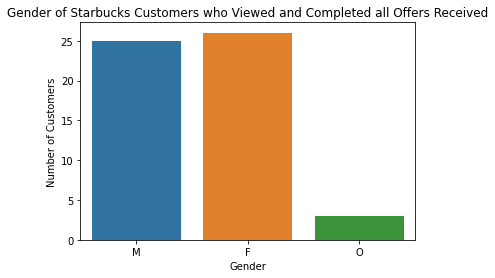

In [368]:
sns.countplot(cust_view_complete_merged['gender'])
plt.title('Gender of Starbucks Customers who Viewed and Completed all Offers Received')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

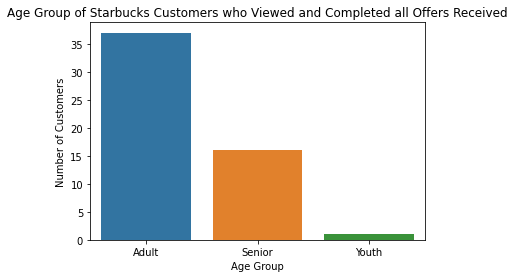

In [369]:
sns.countplot(cust_view_complete_merged['age_group'])
plt.title('Age Group of Starbucks Customers who Viewed and Completed all Offers Received')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

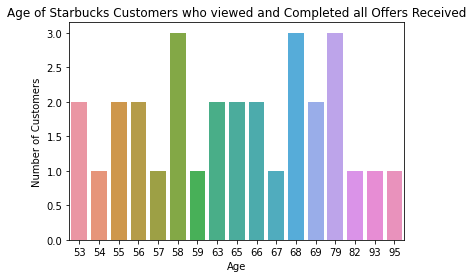

In [366]:
sns.countplot(cust_view_complete_merged['age'].nlargest(30))
plt.title('Age of Starbucks Customers who Viewed and Completed all Offers Received')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

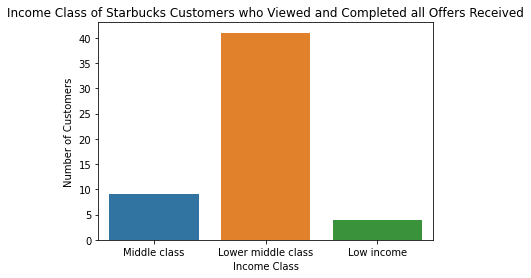

In [370]:
sns.countplot(cust_view_complete_merged['income_class'])
plt.title('Income Class of Starbucks Customers who Viewed and Completed all Offers Received')
plt.xlabel('Income Class')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

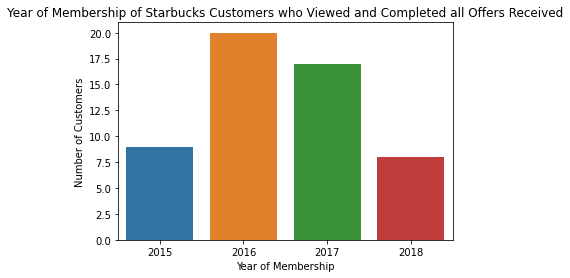

In [371]:
sns.countplot(cust_view_complete_merged['became_member_on_year'])
plt.title('Year of Membership of Starbucks Customers who Viewed and Completed all Offers Received')
plt.xlabel('Year of Membership')
plt.ylabel('Number of Customers')

In [381]:
# Customers who completed and viewed all offers
cust_most_transac = temp2[(temp2['transaction'] > 20)].sort_values('transaction', ascending=False)
cust_most_transac.head()

,amount,rewarded_amount,offer_received,offer_viewed,transaction,offer_completed
person_id,,,,,,
8dbfa485249f409aa223a2130f40634a,76.46,10.0,5,5,36,3
79d9d4f86aca4bed9290350fb43817c2,173.41,12.0,5,3,36,4
94de646f7b6041228ca7dec82adb97d2,90.23,22.0,6,5,35,5
5e60c6aa3b834e44b822ea43a3efea26,103.66,25.0,6,5,32,5
b1f4ece7d49342628a9ed77aee2cde58,133.02,12.0,5,5,32,4


In [382]:
cust_most_transac_merged = cust_most_transac.merge(profile_preprocessed_data, how ='left', on ='person_id')

Text(0, 0.5, 'Number of Customers')

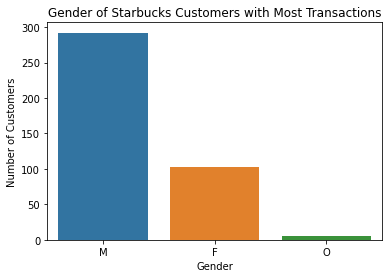

In [383]:
sns.countplot(cust_most_transac_merged['gender'])
plt.title('Gender of Starbucks Customers with Most Transactions')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

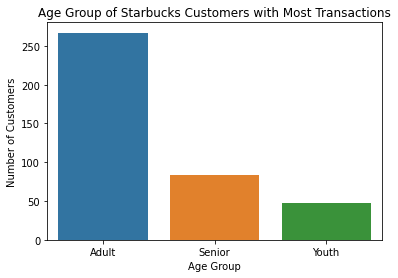

In [384]:
sns.countplot(cust_most_transac_merged['age_group'])
plt.title('Age Group of Starbucks Customers with Most Transactions')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

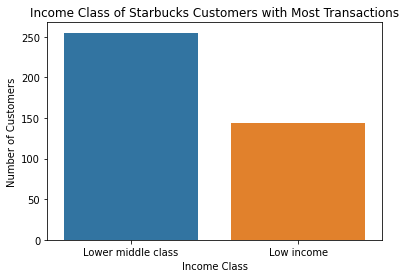

In [386]:
sns.countplot(cust_most_transac_merged['income_class'])
plt.title('Income Class of Starbucks Customers with Most Transactions')
plt.xlabel('Income Class')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

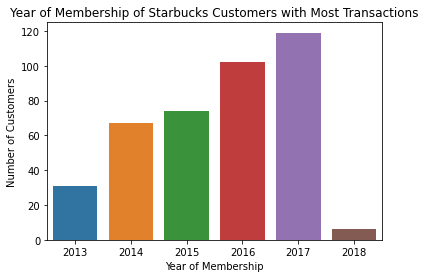

In [387]:
sns.countplot(cust_most_transac_merged['became_member_on_year'])
plt.title('Year of Membership of Starbucks Customers with Most Transactions')
plt.xlabel('Year of Membership')
plt.ylabel('Number of Customers')

In [216]:
# groupby
temp3 = transcript_preprocessed_data_merged.groupby(['person_id','offer_id','event'])[['offer_id','rewarded_amount','amount','rewarded_amount', 'offer_received', 'offer_viewed','transaction','offer_completed' ]].sum()

In [217]:
temp3

rewarded_amount  \
person_id                        offer_id                         event                              
0009655768c64bdeb2e877511632db8f 0                                transaction                  0.0   
                                 2906b810c7d4411798c6938adc9daaa5 offer_completed              2.0   
                                                                  offer_received               0.0   
                                                                  transaction                  0.0   
                                 3f207df678b143eea3cee63160fa8bed offer_received               0.0   
...                                                                                            ...   
ffff82501cea40309d5fdd7edcca4a07 9b98b8c7a33c4b65b9aebfe6a799e6d9 transaction                  0.0   
                                 fafdcd668e3743c1bb461111dcafc2a4 offer_completed              2.0   
                                                                  offer_received               0.0   
                                                                  offer_viewed                 0.0   
                                                                  transaction                  0.0   

                                                                                   amount  \
person_id                        offer_id                         event                     
0009655768c64bdeb2e877511632db8f 0                                transaction       94.65   
                                 2906b810c7d4411798c6938adc9daaa5 offer_completed    0.00   
                                                                  offer_received     0.00   
                                                                  transaction       10.27   
                                 3f207df678b143eea3cee63160fa8bed offer_received     0.00   
...                                                                                   ...   
ffff82501cea40309d5fdd7edcca4a07 9b98b8c7a33c4b65b9aebfe6a799e6d9 transaction        7.79   
                                 fafdcd668e3743c1bb461111dcafc2a4 offer_completed    0.00   
                                                                  offer_received     0.00   
                                                                  offer_viewed       0.00   
                                                                  transaction       16.06   

                                                                                   rewarded_amount  \
person_id                        offer_id                         event                              
0009655768c64bdeb2e877511632db8f 0                                transaction                  0.0   
                                 2906b810c7d4411798c6938adc9daaa5 offer_completed              2.0   
                                                                  offer_received               0.0   
                                                                  transaction                  0.0   
                                 3f207df678b143eea3cee63160fa8bed offer_received               0.0   
...                                                                                            ...   
ffff82501cea40309d5fdd7edcca4a07 9b98b8c7a33c4b65b9aebfe6a799e6d9 transaction                  0.0   
                                 fafdcd668e3743c1bb461111dcafc2a4 offer_completed              2.0   
                                                                  offer_received               0.0   
                                                                  offer_viewed                 0.0   
                                                                  transaction                  0.0   

                                                                                   offer_received  \
person_id                        offer_id                         event                             
0009655768c64bdeb

Offer Effectivness:
In the beginning, I decided to follow this approach. Preparing the data was a lengthy process and it took so much effort. I also faced many challenges. Atthe end, the results weren't very useful in deciding which offer is more effective.

We have 3 values:
1 means offer is effective
0 means offer is ineffective
-1 offer is unnecessary (customer didn't know about it but used it)

In [429]:
# Offer Effectiveness - a different approach
temp = transcript_preprocessed_data_merged.groupby(['offer_id','person_id'],as_index=False)['offer_id','person_id',\
            'amount','rewarded_amount','offer_received','offer_viewed','offer_completed','transaction',].sum()
temp = temp[temp['offer_id'] != '0']
temp

<ipython-input-429-0fa086b01d22>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = transcript_preprocessed_data_merged.groupby(['offer_id','person_id'],as_index=False)['offer_id','person_id',\


,offer_id,person_id,amount,rewarded_amount,offer_received,offer_viewed,offer_completed,transaction
14075,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,0.00,5.0,1,1,1,0
14076,0b1e1539f2cc45b7b9fa7c272da2e1d7,003d66b6608740288d6cc97a6903f4f0,2.25,5.0,1,0,1,1
14077,0b1e1539f2cc45b7b9fa7c272da2e1d7,00426fe3ffde4c6b9cb9ad6d077a13ea,0.00,0.0,1,0,0,0
14078,0b1e1539f2cc45b7b9fa7c272da2e1d7,0056df74b63b4298809f0b375a304cf4,27.59,5.0,1,0,1,1
14079,0b1e1539f2cc45b7b9fa7c272da2e1d7,00715b6e55c3431cb56ff7307eb19675,50.32,10.0,2,1,2,2
...,...,...,...,...,...,...,...,...
69292,fafdcd668e3743c1bb461111dcafc2a4,fff29fb549084123bd046dbc5ceb4faa,15.16,2.0,1,1,1,1
69293,fafdcd668e3743c1bb461111dcafc2a4,fff3ba4757bd42088c044ca26d73817a,20.98,2.0,1,1,1,1
69294,fafdcd668e3743c1bb461111dcafc2a4,fff7576017104bcc8677a8d63322b5e1,5.99,4.0,2,2,2,1
69295,fafdcd668e3743c1bb461111dcafc2a4,fff8957ea8b240a6b5e634b6ee8eafcf,0.00,0.0,1,1,0,0


In [410]:
list(temp.columns) 

['offer_id',
 'person_id',
 'amount',
 'rewarded_amount',
 'offer_received',
 'offer_viewed',
 'offer_completed',
 'transaction']

In [412]:
# offer effectiveness 
# = 1 if all events == 1
# = -1 if offer_viewed > offer_completed 
# otherwise 0
'''
temp['offer_effectiveness'] = \
np.where((temp['offer_received'] > 0) & \
         (temp['offer_viewed'] > 0) & \
         (temp['offer_completed'] > 0) & \
         (temp['transaction'] > 0) , 1 , 0)
'''

In [430]:
# offer effectiveness 
# = 1 if offer_viewed == offer_completed
# = -1 if offer_viewed > offer_completed 
# otherwise 0
temp['offer_effectiveness'] = np.where((temp['offer_viewed'] == temp['offer_completed']) , 1 , 0)

In [431]:
temp['offer_effectiveness'] = np.where((temp['offer_viewed'] < temp['offer_completed']), -1 , temp['offer_effectiveness'])

In [432]:
temp

,offer_id,person_id,amount,rewarded_amount,offer_received,offer_viewed,offer_completed,transaction,offer_effectiveness
14075,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,0.00,5.0,1,1,1,0,1
14076,0b1e1539f2cc45b7b9fa7c272da2e1d7,003d66b6608740288d6cc97a6903f4f0,2.25,5.0,1,0,1,1,-1
14077,0b1e1539f2cc45b7b9fa7c272da2e1d7,00426fe3ffde4c6b9cb9ad6d077a13ea,0.00,0.0,1,0,0,0,1
14078,0b1e1539f2cc45b7b9fa7c272da2e1d7,0056df74b63b4298809f0b375a304cf4,27.59,5.0,1,0,1,1,-1
14079,0b1e1539f2cc45b7b9fa7c272da2e1d7,00715b6e55c3431cb56ff7307eb19675,50.32,10.0,2,1,2,2,-1
...,...,...,...,...,...,...,...,...,...
69292,fafdcd668e3743c1bb461111dcafc2a4,fff29fb549084123bd046dbc5ceb4faa,15.16,2.0,1,1,1,1,1
69293,fafdcd668e3743c1bb461111dcafc2a4,fff3ba4757bd42088c044ca26d73817a,20.98,2.0,1,1,1,1,1
69294,fafdcd668e3743c1bb461111dcafc2a4,fff7576017104bcc8677a8d63322b5e1,5.99,4.0,2,2,2,1,1
69295,fafdcd668e3743c1bb461111dcafc2a4,fff8957ea8b240a6b5e634b6ee8eafcf,0.00,0.0,1,1,0,0,0


In [426]:
# There are some offers completed without a transaction
temp[(temp['offer_completed'] != 0) & (temp['transaction'] == 0)]

,offer_id,person_id,amount,rewarded_amount,offer_received,offer_viewed,offer_completed,transaction,offer_effectiveness
14075,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,0.0,5.0,1,1,1,0,1
14095,0b1e1539f2cc45b7b9fa7c272da2e1d7,0103de989e084e0fab400e80678d7591,0.0,10.0,2,0,2,0,-1
14105,0b1e1539f2cc45b7b9fa7c272da2e1d7,01633b71b3a2457aa7d35d8bcc3afb5a,0.0,5.0,1,1,1,0,1
14114,0b1e1539f2cc45b7b9fa7c272da2e1d7,01ac633821f0498893320b41b5b22dfc,0.0,5.0,1,0,1,0,-1
14124,0b1e1539f2cc45b7b9fa7c272da2e1d7,0215efe5136d4a038cb81eae92d59368,0.0,5.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
69220,fafdcd668e3743c1bb461111dcafc2a4,fcd0080e7fa846abbb637131d0c466e3,0.0,2.0,1,1,1,0,1
69238,fafdcd668e3743c1bb461111dcafc2a4,fd98c46aa9c742b1a5369c1cf18b5705,0.0,2.0,1,1,1,0,1
69245,fafdcd668e3743c1bb461111dcafc2a4,fdea2f3817d74cd9a4b2ce819e62c824,0.0,2.0,1,1,1,0,1
69257,fafdcd668e3743c1bb461111dcafc2a4,fe8264108d5b4f198453bbb1fa7ca6c9,0.0,2.0,1,1,1,0,1


In [433]:
temp[temp['offer_effectiveness'] == 1].count()

offer_id               29743
person_id              29743
amount                 29743
rewarded_amount        29743
offer_received         29743
offer_viewed           29743
offer_completed        29743
transaction            29743
offer_effectiveness    29743
dtype: int64

In [434]:
temp[temp['offer_effectiveness'] == 1]['offer_id'].unique()

array(['0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '2906b810c7d4411798c6938adc9daaa5',
       '3f207df678b143eea3cee63160fa8bed',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '5a8bc65990b245e5a138643cd4eb9837',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       'fafdcd668e3743c1bb461111dcafc2a4'], dtype=object)

In [435]:
temp[temp['offer_effectiveness'] == -1].count()

offer_id               5070
person_id              5070
amount                 5070
rewarded_amount        5070
offer_received         5070
offer_viewed           5070
offer_completed        5070
transaction            5070
offer_effectiveness    5070
dtype: int64

In [436]:
temp.groupby(['offer_effectiveness'])[['rewarded_amount','amount', 'offer_received', 'offer_viewed','transaction','offer_completed']].sum()

,rewarded_amount,amount,offer_received,offer_viewed,transaction,offer_completed
offer_effectiveness,,,,,,
-1,27771.0,108609.33,6465.0,676.0,5060.0,6028.0
0,8595.0,28040.06,25661.0,24680.0,1429.0,1538.0
1,122264.0,469706.36,34375.0,24504.0,23092.0,24504.0


In [197]:
transcript_preprocessed_data[(transcript_preprocessed_data['offer_id'] == '0b1e1539f2cc45b7b9fa7c272da2e1d7')&\
                            (transcript_preprocessed_data['person_id'] == '0011e0d4e6b944f998e987f904e8c1e5')]

,offer_id,person_id,event,time_hours,amount,rewarded_amount,offer_received,offer_viewed,offer_completed,transaction,...,duration_hours,offer_reward,difficulty,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational
136615,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,offer_received,408,NaN,NaN,1,0,0,0,...,240.0,5.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
157989,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,offer_viewed,432,NaN,NaN,0,1,0,0,...,240.0,5.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
229843,0b1e1539f2cc45b7b9fa7c272da2e1d7,0011e0d4e6b944f998e987f904e8c1e5,offer_completed,576,NaN,5.0,0,0,1,0,...,240.0,5.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
'''

offer_data = []
person_ids = profile_preprocessed_data['person_id'].unique()
person_ids

for i in range(len(person_ids)):
    person_id = person_ids[i]

    person_offers_records = transcript_preprocessed_data[transcript_preprocessed_data['person_id'] == person_id]
    
    person_offer_recieved_records = person_offers_records[person_offers_records['offer_received'] == 1]
    person_offer_viewed_records = person_offers_records[person_offers_records['offer_viewed'] == 1]
    person_offer_completed_records = person_offers_records[person_offers_records['offer_completed'] == 1]
    
    rec = []
    
    for j in range(person_offer_recieved_records.shape[0]):
        offer_duration_hours = person_offer_recieved_records.iloc[j]['duration_hours']
        offer_start_time = person_offer_recieved_records.iloc[j]['time_hours']
        offer_end_time = offer_start_time + offer_duration_hours
        
        #print('offer_duration_hours:',offer_duration_hours)
        #print('offer_start_time: ',offer_start_time)
        #print('offer_end_time: ',offer_end_time)
        
        offer_view_within_time = np.logical_and(person_offer_viewed_records['time_hours']>= offer_start_time, person_offer_viewed_records['time_hours']<= offer_end_time)
        offer_completed_within_time = np.logical_and(person_offer_completed_records['time_hours']>= offer_start_time, person_offer_completed_records['time_hours']<= offer_end_time)
        
        #print('offer_view_within_time: ',offer_view_within_time)
        #print('offer_completed_within_time: ',offer_completed_within_time)
        
        if offer_view_within_time & offer_completed_within_time:
            offer_effectiveness = 1
        else:
            offer_effectiveness = 0
            
        print('offer_effectiveness: ',offer_effectiveness)
        #print('offer_view_within_time: ',offer_view_within_time)
        #print('offer_completed_within_time: ',offer_completed_within_time)'''

# Part 5 :  Conclusion
   ## - Reflection
   
   - Understanding the data took so much time. I kept learning and I still think there is so much to learn.
   - There is no end for the possibilities for the analysis. Having a clear idea at the beginning is important to avoid being stuck in analysis paralysis.
   - Having a plan on how the data will be used is critical when collecting the data. Some records are outliers where for example there are some records of completed offers but no transactions related to that record. This and others harm the analysis and decrease its accuracy.
   
   
   ## - Improvement
   Collecting Data:
   When running the experiment, add a primary key to connect between the offer different events, especially  transaction and completed.
   Offer_expired value can be calculated on the spot and added to the data instead of reverse engineer it.
   
   Analysis:
   At the end of the analysis I realized that changing some column names or even values would have helped me throughout the analysis. For example: Person_id was a weird  name for customer id. I could have changed it. Also the offers names: I could have used the first letter of the offer type. For example: ae264e3637204a6fb9bb56bc8210ddfd is of type BOGO. I could have changed it to BOGO1 or even B1. This would have enhanced readability.
   
   I have re-written some of the logic to enhance the performance. However, I haven't measured the time to run the entire workspace. More enhancements  could be done.
